# Assignment 1, Gradient Descent

 Brent Staab

In this first assignment, we are applying python code that performs gradient descent to fit several models to the air quality data discussed in the lecture during the first week.  

## Requirements

1. Implement (or copy from lecture notes if available) the following functions:

    * `linear_model(X, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `W`, a 2 x 1 numpy array of weight values, with the first weight being the bias, or y-intercept, weight
        * Return
            * an N x 1 numpy array of the linear model's predicted outputs for each sample in `X`.
        
    * `linear_model_gradient(X, T, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `T`, an N x 1 numpy array of correct outputs for each input sample
            * `W`, a 2 x 1 numpy array of weight values, with the first weight being the bias, or y-intercept, weight
        * Return
            * an 2 x 1 numpy array of the gradient of the mean squared error function with respect to each weight.

    * `quadratic_model(X, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `W`, a 3 x 1 numpy array of weight values, ordered as the bias weight, the weight for `X`, and the weight for `X**2` 
        * Return
            * an N x 1 numpy array of the quadratic model's predicted outputs for each sample in `X`.
        
    * `quadratic_model_gradient(X, T, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `T`, an N x 1 numpy array of correct outputs for each input sample
            * `W`, a 3 x 1 numpy array of weight values, ordered as for `quadratic_model`
        * Return
            * an 3 x 1 numpy array of the gradient of the mean squared error function with respect to each weight.

    * `quartic_model(X, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `W`, a 5 x 1 numpy array of weight values, ordered as the bias weight, the weight for `X`, the weight for `X**2`, the weight for `X**3`, and the weight for `X**4`
        * Return
            * an N x 1 numpy array of the quartic model's predicted outputs for each sample in `X`.
        
    * `quartic_model_gradient(X, T, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `T`, an N x 1 numpy array of correct outputs for each input sample
            * `W`, a 5 x 1 numpy array of weight values, ordered as for `quartic_model`
        * Return
            * an 5 x 1 numpy array of the gradient of the mean squared error function with respect to each weight.


2. Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells. This is a little different than what was done in class. Plot `CO(GT)` air quality versus the hour of the day to verify you have prepared the data correctly.

3. Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the linear model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the linear model on the same graph.  All of this is illustrated here using a `cubic_model`.  Once this is working, copy and paste the code cells for each model and train each model with at least five different learning rates, from 1.e-2, to 1.e-10 to find rates that result in the lowest error.  Do not change the number of iterations steps.  Include the code and results for each. Discuss in markdown cells the best learning rate values and errors you get for each model.


## Import code needed in this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

## 1) Implement functions

### Linear Functions

In [2]:
def linear_model(X, W):
    # W is column vector
    return X @ W[1:, :] + W[0,:]

In [3]:
def linear_model_gradient(X, T, W):
    dEdY = -2 * (T - linear_model(X, W))
    dYdW = np.insert(X, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

##### Linear Function Verification

Linear Model Gradient - Expeiment 1 ([[ 3.29596867 18.964904  ]])
Linear Model Gradient - Expeiment 2 ([[0.22096867 0.189904  ]])


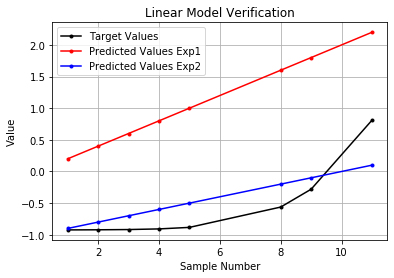

In [4]:
# Linear model data
X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))  # Input data
T = (((X - 5) * 0.05 +  (X * 0.2) **5) / 5.0 - 5.5) / 6   # Target values
W1 = np.array([0.0000, 0.2]).reshape(-1, 1)               # Experiment 1 - Weights
Y1 = linear_model(X, W1)                                  # Experiment 1 - Model output
E1 = linear_model_gradient(X, T, W1)                      # Experiment 1 - Gradients
W2 = np.array([-1.0000, 0.1]).reshape(-1, 1)              # Experiment 2 - Weights
Y2 = linear_model(X, W2)                                  # Experiment 2 - Model output
E2 = linear_model_gradient(X, T, W2)                      # Experiment 2 - Gradients

# Plot the results
plt.title('Linear Model Verification')                    # Add plot title
plt.plot(X, T, 'k.-', label='Target Values')              # Plot target values
plt.plot(X, Y1,'r.-', label='Predicted Values Exp1')      # Plot values from model - Experiment 1
plt.plot(X, Y2,'b.-', label='Predicted Values Exp2')      # Plot values from model - Experiment 2
plt.grid(True)                                            # Display a grid on plot
plt.xlabel('Sample Number')                               # Add X-Axis label
plt.ylabel('Value')                                       # Add Y-Axis label
plt.legend();                                             # Add Legend

# Print the Linear Model gradient outputs 
print("Linear Model Gradient - Expeiment 1 ({})".format(E1.T))
print("Linear Model Gradient - Expeiment 2 ({})".format(E2.T))

The data above shows two estimations of test data using a **linear** mode with different weights and the output of the corresponding gradient function.  It can be seen that the second prediction (blue line) is much closer to the test data than the first.  It will be shown, later in this notebook, that the weights can be adjusted to find an optimal estimation that minimizes the error.

### Quadratic Functions

In [5]:
def quadratic_model(X, W):
    # W is column vector
    n_columns = X.shape[1]
    linear_part = X @ W[1:n_columns + 1, :] + W[0,:]
    nonlinear_part = X**2 @ W[n_columns + 1:n_columns + 2, :]
    return nonlinear_part + linear_part

In [6]:
def quadratic_model_gradient(X, T, W):
    dEdY = -2 * (T - quadratic_model(X, W))
    linear_part = np.insert(X, 0, 1, axis=1)
    nonlinear_part = X**2
    dYdW = np.hstack((linear_part, nonlinear_part))
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

##### Quadratic Function Verification

In [7]:
X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
T = (((X - 5) * 0.05 +  (X * 0.2) **5) / 5.0 - 5.5) / 6
W = np.zeros((3, 1))

Quadratic Model Gradient - Expeiment 1 ([[ 2.08471867 10.423654   70.30360467]])
Quadratic Model Gradient - Expeiment 2 ([[ 0.95946867  5.559404   39.88935467]])


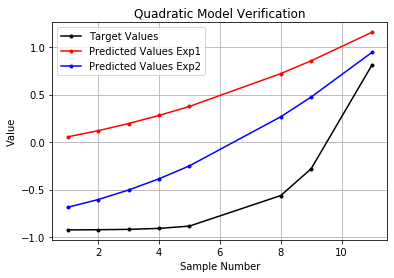

In [8]:
# Quadratic model data
X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))  # Input data
T = (((X - 5) * 0.05 +  (X * 0.2) **5) / 5.0 - 5.5) / 6   # Target values
W1 = np.array([0.0, 0.05, 0.005]).reshape(-1, 1)          # Experiment 1 - Weights
Y1 = quadratic_model(X, W1)                               # Experiment 1 - Model output
E1 = quadratic_model_gradient(X, T, W1)                   # Experiment 1 - Gradients
W2 = np.array([-0.75000, 0.055, 0.009]).reshape(-1, 1)    # Experiment 2 - Weights
Y2 = quadratic_model(X, W2)                               # Experiment 2 - Model output
E2 = quadratic_model_gradient(X, T, W2)                   # Experiment 2 - Gradients

# Plot the results
plt.title('Quadratic Model Verification')                 # Add plot title
plt.plot(X, T, 'k.-', label='Target Values')              # Plot target values
plt.plot(X, Y1,'r.-', label='Predicted Values Exp1')      # Plot values from model - Experiment 1
plt.plot(X, Y2,'b.-', label='Predicted Values Exp2')      # Plot values from model - Experiment 2
plt.grid(True)                                            # Display a grid on plot
plt.xlabel('Sample Number')                               # Add X-Axis label
plt.ylabel('Value')                                       # Add Y-Axis label
plt.legend();                                             # Add Legend

# Print the Quadratic Model gradient outputs 
print("Quadratic Model Gradient - Expeiment 1 ({})".format(E1.T))
print("Quadratic Model Gradient - Expeiment 2 ({})".format(E2.T))

The graph above shows two estimations of test data using a **quadratic** mode with different weights and the output of the corresponding gradient function.  It can be seen that the second prediction (blue line) is much closer to the test data than the first.  It will be shown, later in this notebook, that the weights can be adjusted to find an optimal estimation that minimizes the error.

### Cubic Functions

In [9]:
def cubic_model(X, W):
    return np.hstack((X, X**2, X**3)) @ W[1:, :] + W[0, :]

In [10]:
def cubic_model_gradient(X, T, W):
    dEdY = -2 * (T - cubic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

##### Cubic Function Verification

In [11]:
X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
T = (((X - 5) * 0.05 +  (X * 0.2) **5) / 5.0 - 5.5) / 6
W = np.zeros((4, 1))

Cubic Model Gradient - Expeiment 1 ([[  2.08471867  10.423654    70.30360467 553.547458  ]])
Cubic Model Gradient - Expeiment 2 ([[  0.45946867   2.871904    19.82685467 144.436708  ]])


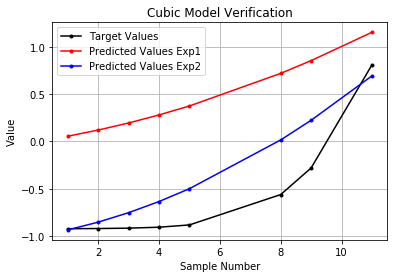

In [12]:
# Cubic model data
X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))  # Input data
T = (((X - 5) * 0.05 +  (X * 0.2) **5) / 5.0 - 5.5) / 6   # Target values
W1 = np.array([0.0, 0.05, 0.005, 0]).reshape(-1, 1)       # Experiment 1 - Weights
Y1 = cubic_model(X, W1)                                   # Experiment 1 - Model output
E1 = cubic_model_gradient(X, T, W1)                       # Experiment 1 - Gradients
W2 = np.array([-1.00000, 0.055, 0.009, 0]).reshape(-1, 1) # Experiment 2 - Weights
Y2 = cubic_model(X, W2)                                   # Experiment 2 - Model output
E2 = cubic_model_gradient(X, T, W2)                       # Experiment 2 - Gradients

# Plot the results
plt.title('Cubic Model Verification')                     # Add plot title
plt.plot(X, T, 'k.-', label='Target Values')              # Plot target values
plt.plot(X, Y1,'r.-', label='Predicted Values Exp1')      # Plot values from model - Experiment 1
plt.plot(X, Y2,'b.-', label='Predicted Values Exp2')      # Plot values from model - Experiment 2
plt.grid(True)                                            # Display a grid on plot
plt.xlabel('Sample Number')                               # Add X-Axis label
plt.ylabel('Value')                                       # Add Y-Axis label
plt.legend();                                             # Add Legend

# Print the Cubic Model gradient outputs
print("Cubic Model Gradient - Expeiment 1 ({})".format(E1.T))
print("Cubic Model Gradient - Expeiment 2 ({})".format(E2.T))

The graph above shows two estimations of test data using a **cubic** mode with different weights and the output of the corresponding gradient function.  It can be seen that the second prediction (blue line) is much closer to the test data than the first.  It will be shown, later in this notebook, that the weights can be adjusted to find an optimal estimation that minimizes the error.

### Quartic Functions

In [13]:
def quartic_model(X, W):
    return np.hstack((X, X**2, X**3, X**4)) @ W[1:, :] + W[0, :]

In [14]:
def quartic_model_gradient(X, T, W):
    dEdY = -2 * (T - quartic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3, X**4))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

##### Quartic Function Verification

Quartic Model Gradient - Expeiment 1 ([[2.08471867e+00 1.04236540e+01 7.03036047e+01 5.53547458e+02
  4.73273259e+03]])
Quartic Model Gradient - Expeiment 2 ([[1.61639367e+00 1.19917290e+01 1.04530880e+02 9.80852133e+02
  9.57921726e+03]])


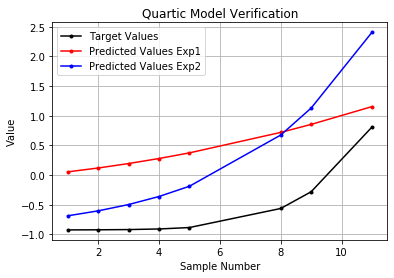

In [15]:
# Quartic model data
X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))       # Input data
T = (((X - 5) * 0.05 +  (X * 0.2) **5) / 5.0 - 5.5) / 6        # Target values
W1 = np.array([0.0, 0.05, 0.005, 0, 0]).reshape(-1, 1)         # Experiment 1 - Weights
Y1 = quartic_model(X, W1)                                      # Experiment 1 - Model output
E1 = quartic_model_gradient(X, T, W1)                          # Experiment 1 - Gradients
W2 = np.array([-0.75, 0.055, 0.009, 0, 0.0001]).reshape(-1, 1) # Experiment 2 - Weights
Y2 = quartic_model(X, W2)                                      # Experiment 2 - Model output
E2 = quartic_model_gradient(X, T, W2)                          # Experiment 2 - Gradients

# Plot the results
plt.title('Quartic Model Verification')                        # Add plot title
plt.plot(X, T, 'k.-', label='Target Values')                   # Plot target values
plt.plot(X, Y1,'r.-', label='Predicted Values Exp1')           # Plot values from model - Experiment 1
plt.plot(X, Y2,'b.-', label='Predicted Values Exp2')           # Plot values from model - Experiment 2
plt.grid(True)                                                 # Display a grid on plot
plt.xlabel('Sample Number')                                    # Add X-Axis label
plt.ylabel('Value')                                            # Add Y-Axis label
plt.legend();                                                  # Add Legend

# Print the Quartic Model gradient outputs
print("Quartic Model Gradient - Expeiment 1 ({})".format(E1.T))
print("Quartic Model Gradient - Expeiment 2 ({})".format(E2.T))

The graph above shows two estimations of test data using a **quartic** mode with different weights and the output of the corresponding gradient function.  It can be seen that the second prediction (blue line) is much closer to the test data than the first.  It will be shown, later in this notebook, that the weights can be adjusted to find an optimal estimation that minimizes the error.

#### Helper & common functions

In [16]:
# Function to calculate the Root Mean Square Error (RMSE) for a given model with
# a set of input data, target data and weights for the model.
def rmse(model, X, T, W):
    Y = model(X, W)
    return np.sqrt(np.mean((T - Y)**2))

In [17]:
# A function to compute the Adaptive Moment Estimation (Adam) or adaptive learning rates
# for a given model and parameters 
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, n_steps=1):
    # Commonly used parameter values
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    
    for step in range(n_steps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= rho * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence

### Additional test/verification #1

In [18]:
X = np.array([0.1, 0.4, 0.7]).reshape(-1, 1)
T = np.array([2.0, 1.0, 8.0]).reshape(-1, 1)
W = np.array([2.0, 1.0, -0.5, 0.3]).reshape((-1, 1))

In [19]:
#cubic_model_gradient(X, T, W)
W = np.zeros((4, 1))
rho = 1.e-1
n_steps = 3000
W, error_sequence, W_sequence = \
    gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')

Final RMSE for rho 0.1 at step 3000 is 0.010134


### Additional test/verification #2

This is the example where folks get 0.0184 or 0.0166.  When I run this notebook on my system, I get an output of '0.016617411613005652'

In [20]:
X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
T = (((X - 5) * 0.05 +  (X * 0.2) **5) / 5.0 - 5.5) / 6
W = np.zeros((4, 1))

In [21]:
W, error_sequence, W_sequence = gradient_descent_adam(
       cubic_model, cubic_model_gradient, rmse, X, T, W, rho=1e-3, n_steps=10000)

In [22]:
error_sequence[-1]
#correct_err = 0.0184

0.016617411613005652

# Air Quality Data

Download and prepare the data.  The process is slightly modified from what we did in lecture.  Only using the first 46 samples (reduced to 43 after removing samples with missing values).

In [23]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip -o AirQualityUCI.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1507k  100 1507k    0     0  1842k      0 --:--:-- --:--:-- --:--:-- 1841k
Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [24]:
# Read data from file, the file must be in same location as this notebook
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',',usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']] # Only get the Time and CO(GT) column data, discard the rest
data = data[:46]                # only use the first 46 samples
data = data.dropna(axis=0)      # axis=0 -> Drop rows which contain missing values
                                # Note: drop rows AFTER initial filtering.  If we do this step before
                                #       it will most likely result in less data because 'na' will likely
                                #       show up in one of the other columns, resulting in the entire row
                                #       being thrown away

# ----------------------------------------
# Create numpy arrays for plotting.
# Extract and format the data of interest

# Get just the hour part of the time string and convert to an int
hour = np.array([int(t[:2]) for t in data['Time']])

# Convert the pandas data into a numpy array
CO = np.array(data['CO(GT)'])

# Make sure the data is in a single column ... variable_num_rows, 1 column
T = CO.reshape(-1, 1)
X = hour.reshape(-1, 1)

# Create labels for the data
Tnames = ['CO']
Xnames = ['Hour']

# Print debug info
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)

X.shape = (43, 1) Xnames = ['Hour']
T.shape = (43, 1) Tnames = ['CO']


## Plot `CO(GT)` air quality versus the hour of the day

Plot `CO(GT)` air quality versus the hour of the day to verify you have prepared the data correctly.

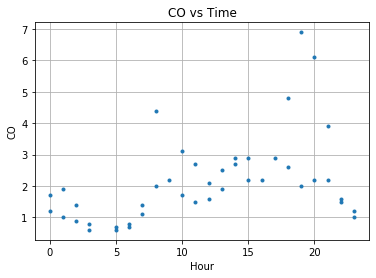

In [25]:
plt.plot(X, T, '.')       # Plot CO vs Time, each data point is identified as '.'
plt.grid(True)            # Display a grid on plot
plt.title('CO vs Time')   # Add plot title
plt.xlabel(Xnames[0])     # Add X-Axis label
plt.ylabel(Tnames[0])     # Add Y-Axis label
plt.show()                # Do this to suppress automatic plt text from last command run

Add code cells here to implement the linear, quadratic, cubic, and quartic models, and to fit the models to the air quality data.

Also add markdown cells that explain each result and summarize your observations of the plots.

Use the gradient_descent_adam function defined in the lecture notes to find the best weights for the linear model, as illustrated in lecture. Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the linear model on the same graph. All of this is illustrated here using a cubic_model. Once this is working, copy and paste the code cells for each model and train each model with at least five different learning rates, from 1.e-2, to 1.e-10 to find rates that result in the lowest error. Do not change the number of iterations steps. Include the code and results for each. Discuss in markdown cells the best learning rate values and errors you get for each model.

In [26]:
# HELPER FUNCTION used to create a set of plots for a given model and data set
def plot_data(Model_Name, learning_rate, error_seq, w_seq, X, T, model_output):
    plt.figure(figsize=(20, 5))
    #---------------------------------------------------------------------------------
    title = 'Model ({}), learning rate({})'.format(Model_Name, learning_rate)
    plt.suptitle(title, fontsize=14, fontweight='bold', y=1.00)
    #---------------------------------------------------------------------------------
    plt.subplot(1, 3, 1)                        # First plot
    plt.plot(error_seq)                    # Add data to plot
    plt.grid(True)                              # Display a grid on plot
    plt.title('RMSE vs Iterations')             # Add plot title
    plt.xlabel('Iteration')                     # Add X-Axis label
    plt.ylabel('RMSE')                          # Add Y-Axis label
    #---------------------------------------------------------------------------------
    plt.subplot(1, 3, 2)                        # Second plot
    plt.plot(w_seq)                        # Add data to plot
    plt.grid(True)                              # Display a grid on plot
    plt.title('Weights vs Iterations')          # Add plot title
    plt.xlabel('Iteration')                     # Add X-Axis label
    plt.ylabel('Weight')                        # Add Y-Axis label
    #---------------------------------------------------------------------------------
    #plot the air quality versus hour of the day again and superimpose the linear model
    plt.subplot(1, 3, 3)                        # Third plot
    plt.plot(X, T, 'o')                         # Plot the air quality vs hr of day
    xs = np.linspace(0, 23, model_output.size).reshape(-1, 1) #
    plt.plot(xs, model_output);                 #
    plt.grid(True)                              # Display a grid on plot
    plt.title('Air quality vs Hour of Day')     # Add plot title
    plt.xlabel('Hour of day')                   # Add X-Axis label
    plt.ylabel('Air quality')                   # Add Y-Axis label
    #---------------------------------------------------------------------------------

In [27]:
# HELPER FUNCTION used to train a model and print the results
def train_models_and_print(model_name, model_f, model_gradient_f, num_weight_rows):
    # Number of steps to train
    n_steps = 3000
    
    # Learning rates for each model
    learning_rates = [1.0, 5.e-1, 4.e-1, 3.e-1, 2.e-1, 1.e-1, 1.e-2, 1.e-3, 1.e-4, 1.e-6, 1.e-8, 1.e-10, 1.e-100]
    
    # Variable to store error values for post processing
    error_value = []
    
    # Test each learning rate in the list
    for rho in learning_rates:
        W = np.zeros((num_weight_rows, 1))
        W, error_sequence, W_sequence = gradient_descent_adam(model_f, model_gradient_f, rmse, X, T, W, rho, n_steps)
        error_value.append(np.sqrt(error_sequence[-1]))
        print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')

        # Create data to test the model.  It consists of 300 samples, linearly spaced, in the range
        # of 0 to 23 inclusive.  This data will be run through the specific model, using the weights 
        # obtained in the gradient_descent_adam function.
        xs = np.linspace(0, 23, 300).reshape(-1, 1)
        md = model_f(xs, W)
        plot_data(model_name, rho, error_sequence, W_sequence, X, T, md)
    
    # Plot the the RMSE vs Learning rate
    plt.figure(figsize=(20, 5))
    plt.plot(learning_rates, error_value, '.-') # Error vs Learning Rate, each data point is identified as '.'
    plt.grid(True)                              # Display a grid on plot
    plt.title('RMSE vs Learning Rate')          # Add plot title
    plt.xlabel('Learning Rate')                 # Add X-Axis label
    plt.ylabel('RMSE')                          # Add Y-Axis label
    plt.show()                                  # Do this to suppress automatic plt text from last command run

Final RMSE for rho 1.0 at step 3000 is 1.100504
Final RMSE for rho 0.5 at step 3000 is 1.100504
Final RMSE for rho 0.4 at step 3000 is 1.100504
Final RMSE for rho 0.3 at step 3000 is 1.100504
Final RMSE for rho 0.2 at step 3000 is 1.100578
Final RMSE for rho 0.1 at step 3000 is 1.100504
Final RMSE for rho 0.01 at step 3000 is 1.100504
Final RMSE for rho 0.001 at step 3000 is 1.101005
Final RMSE for rho 0.0001 at step 3000 is 1.141051
Final RMSE for rho 1e-06 at step 3000 is 1.582756
Final RMSE for rho 1e-08 at step 3000 is 1.594297
Final RMSE for rho 1e-10 at step 3000 is 1.594413
Final RMSE for rho 1e-100 at step 3000 is 1.594414


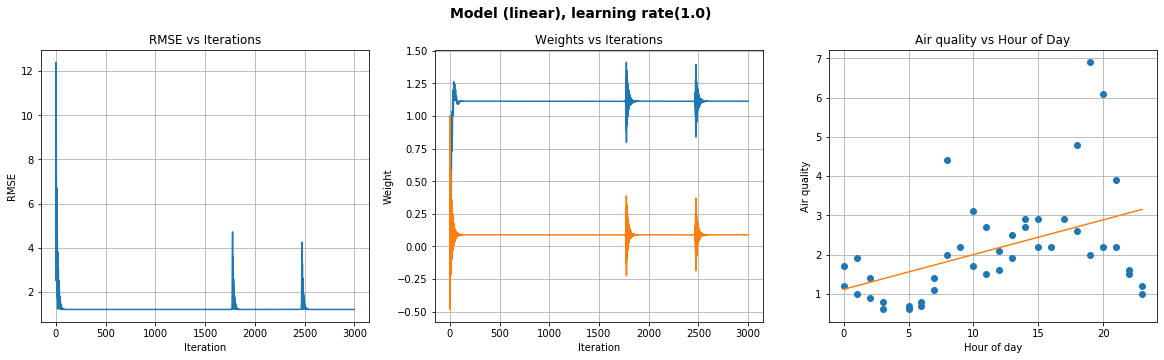

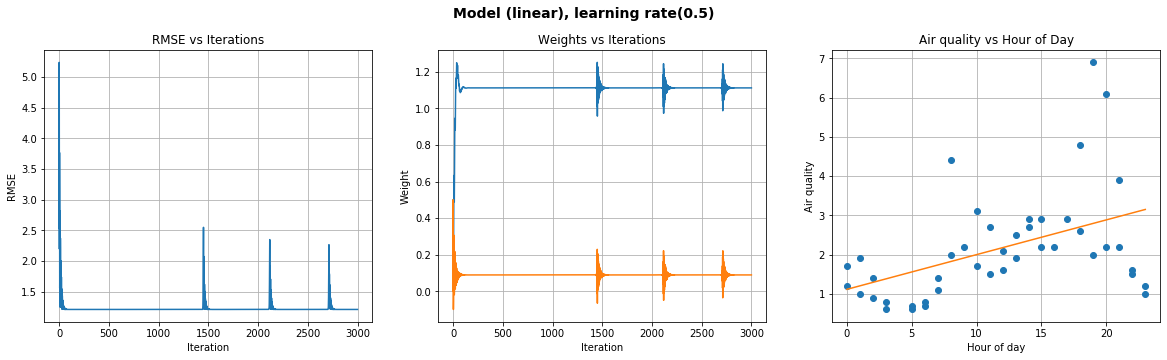

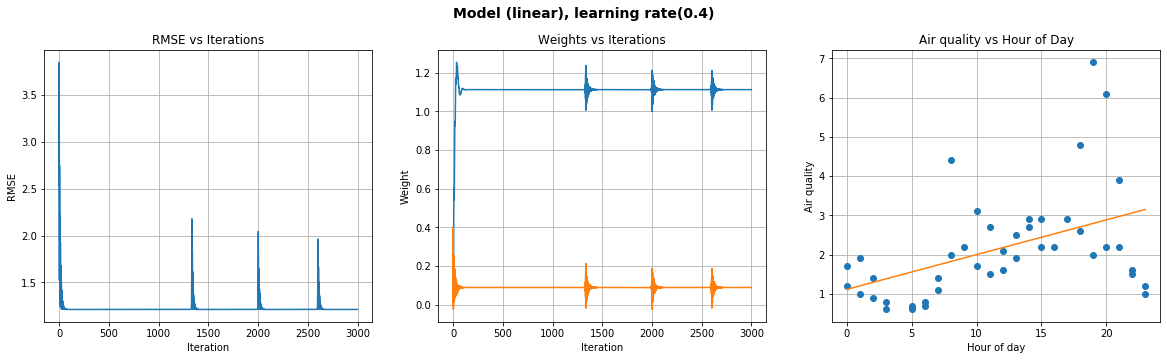

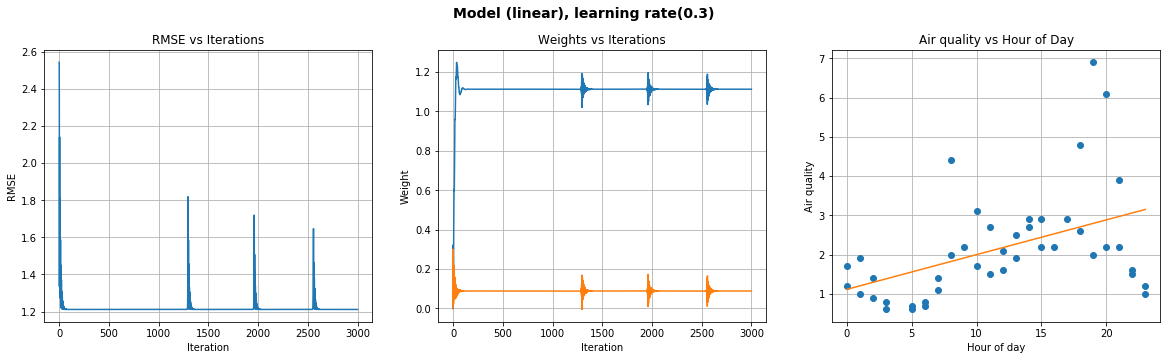

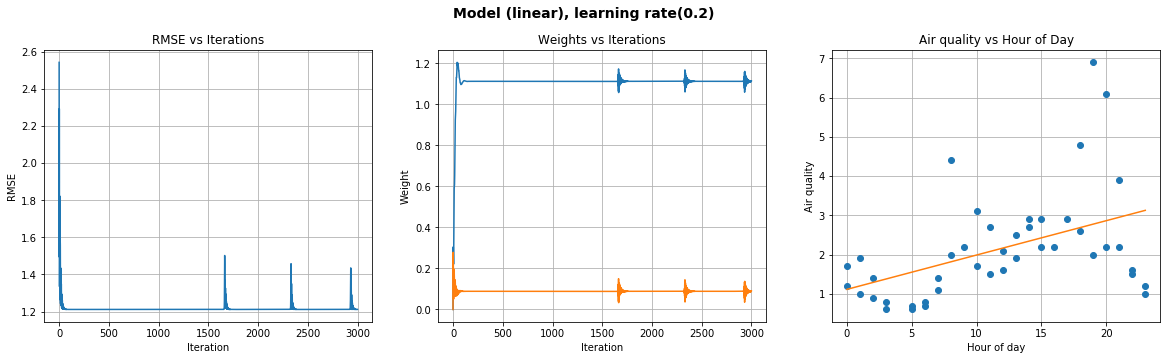

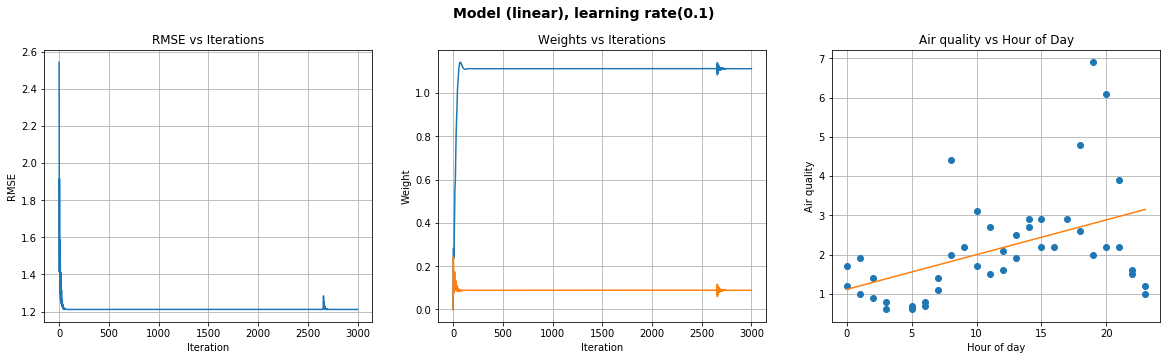

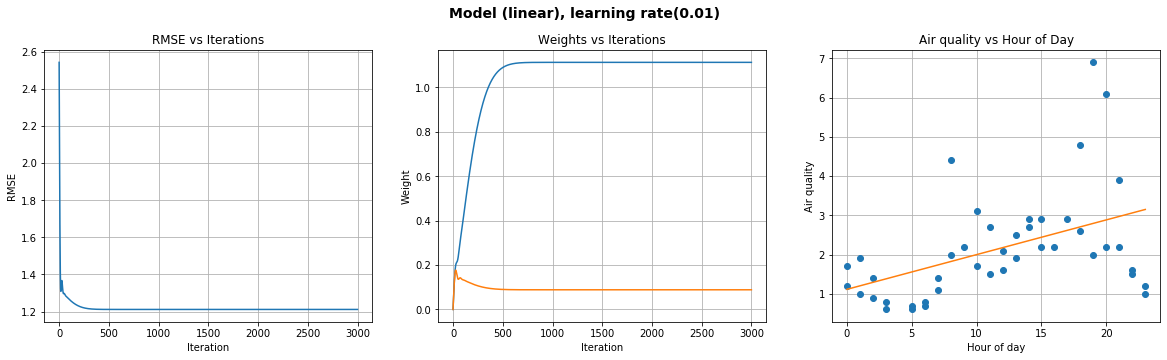

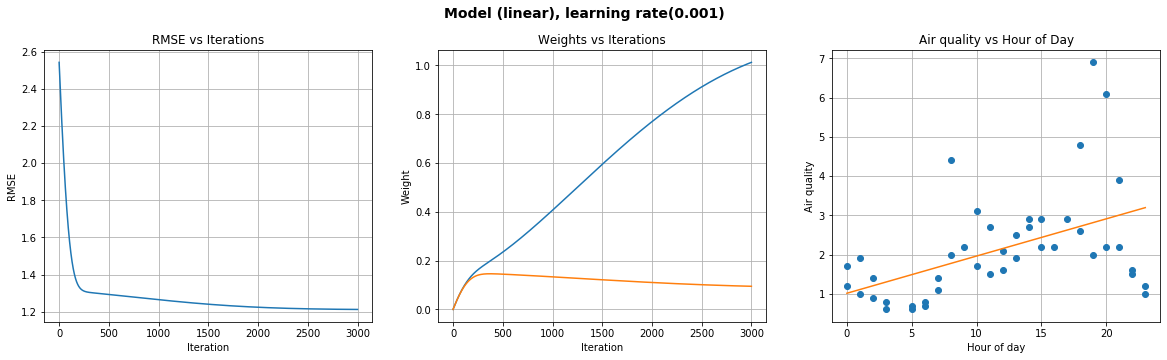

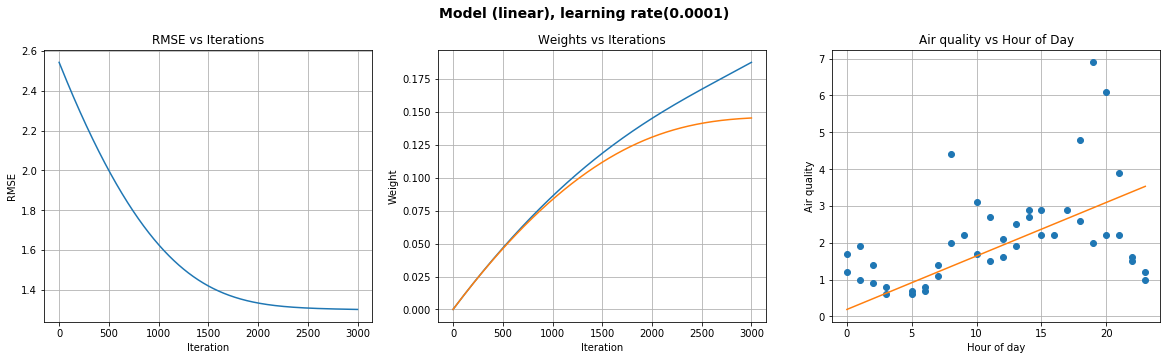

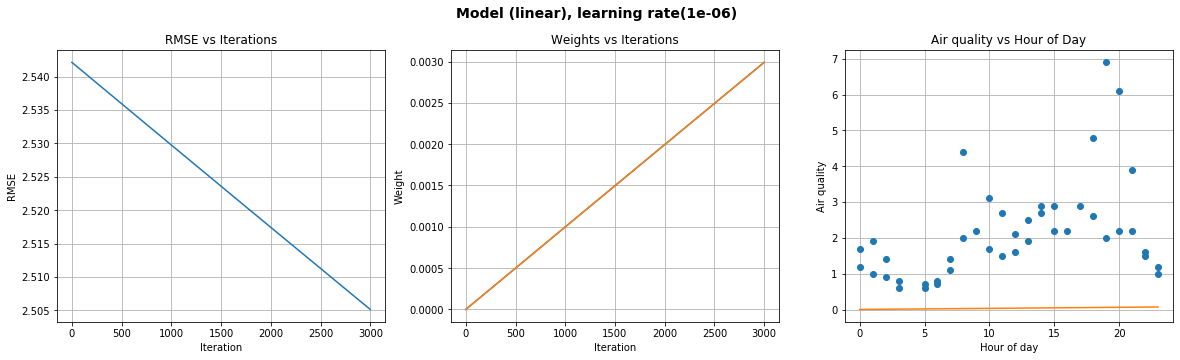

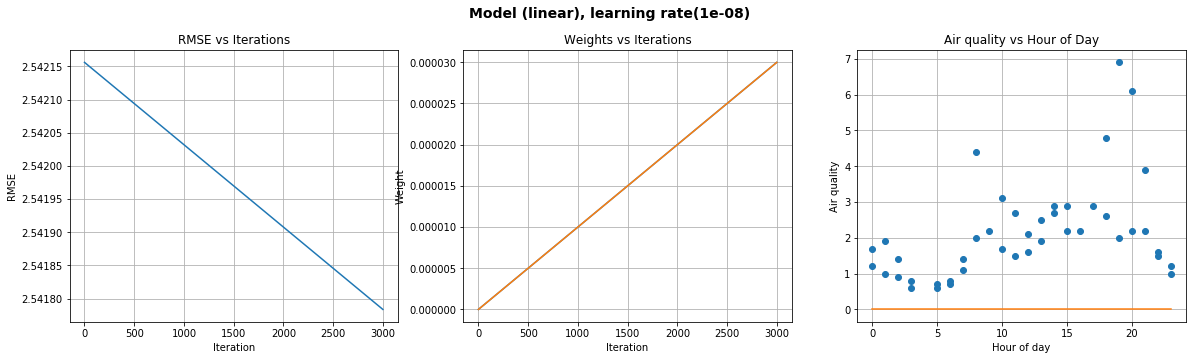

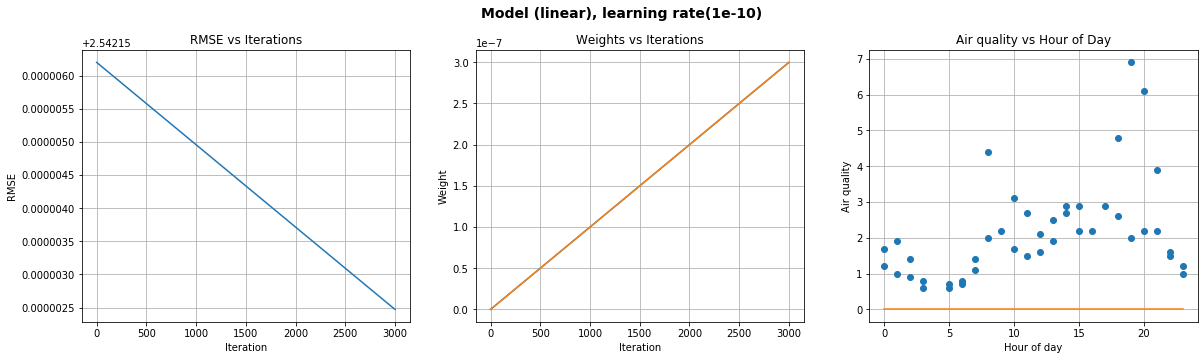

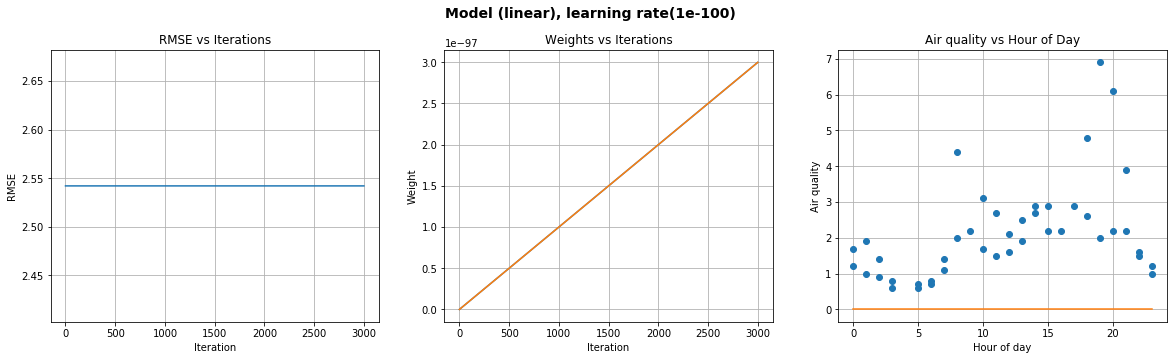

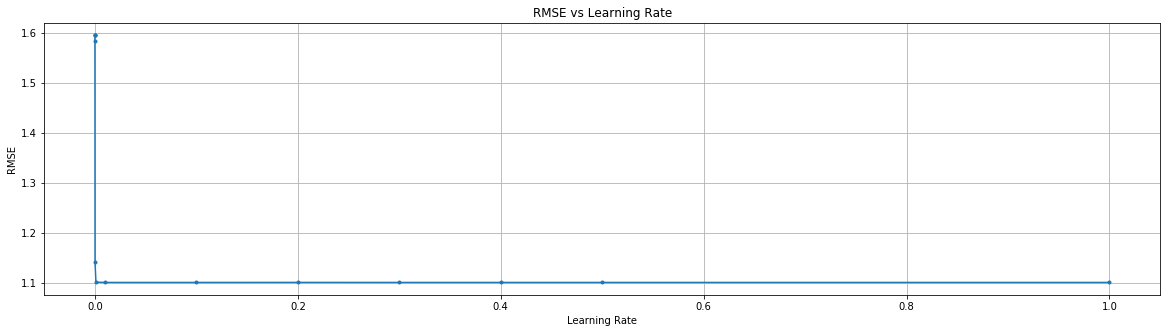

In [28]:
train_models_and_print("linear", linear_model, linear_model_gradient, 2)

Overall, a larger learning rater results in a better estimation (lower RMSE) and lower learning rates result in a worse estimateion (higher RMSE).  In both cases, the behavior does not continue without bound.  Specifically, the best RMSE (1.100504) is observed with a learning rate of 0.01.  Values above this do not yield any improvement.  The worst RMSE (1.594413) is observed with the lowest learning rate (1e-10), but the difference in RMSE between 1e-6 and 1e-10 is only 0.011657 or less than 1%.  From the charts, you can see that the lower learning rates result in a flatter line (smaller slope) which also starts at the origin.  Larger learning rates have a larger slope that has a y intercept around 1.  This curve more closely matches the data samples and results in a lower RMSE.

Final RMSE for rho 1.0 at step 3000 is 1.087891
Final RMSE for rho 0.5 at step 3000 is 1.087891
Final RMSE for rho 0.4 at step 3000 is 1.087891
Final RMSE for rho 0.3 at step 3000 is 1.087891
Final RMSE for rho 0.2 at step 3000 is 1.087891
Final RMSE for rho 0.1 at step 3000 is 1.087891
Final RMSE for rho 0.01 at step 3000 is 1.087891
Final RMSE for rho 0.001 at step 3000 is 1.087928
Final RMSE for rho 0.0001 at step 3000 is 1.122365
Final RMSE for rho 1e-06 at step 3000 is 1.424873
Final RMSE for rho 1e-08 at step 3000 is 1.592491
Final RMSE for rho 1e-10 at step 3000 is 1.594395
Final RMSE for rho 1e-100 at step 3000 is 1.594414


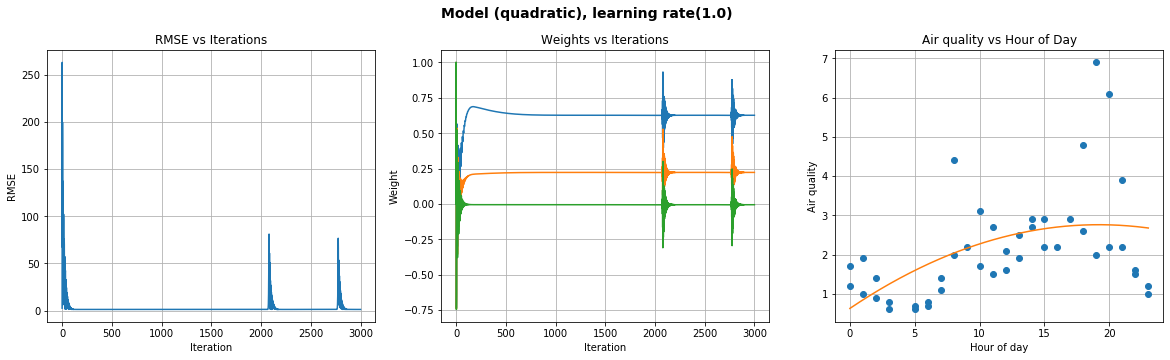

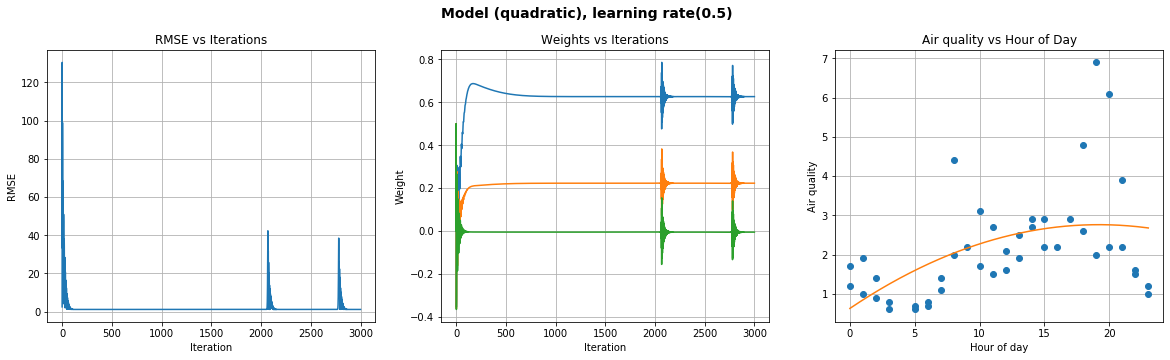

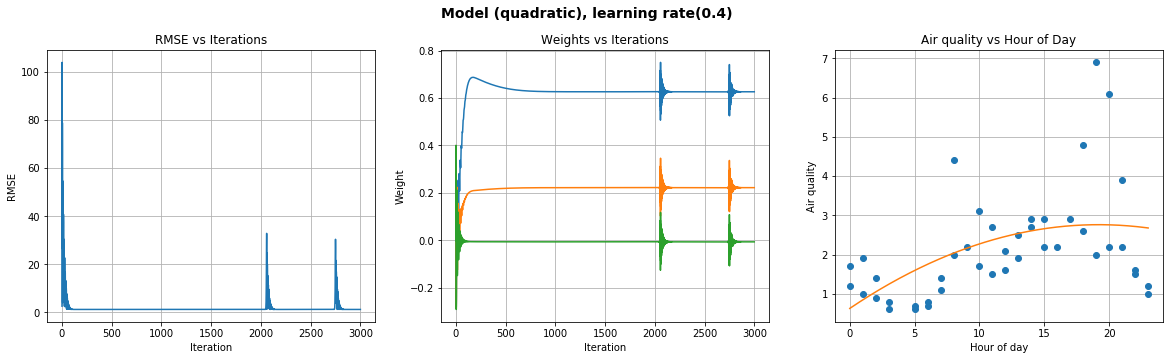

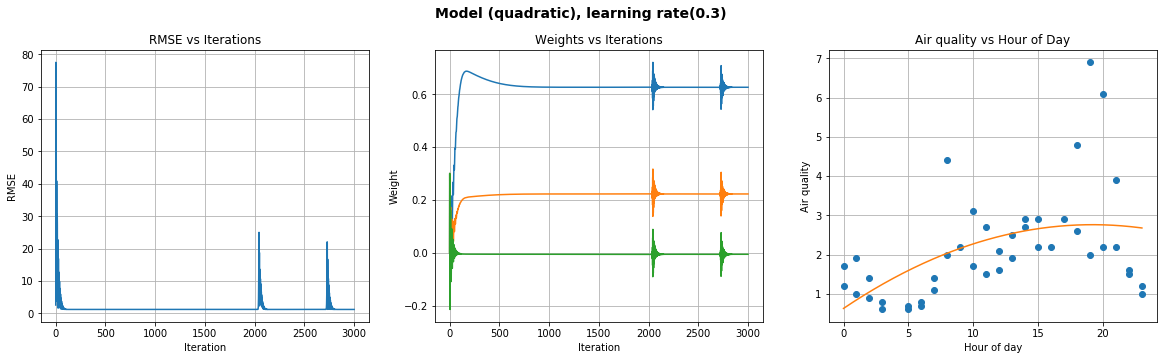

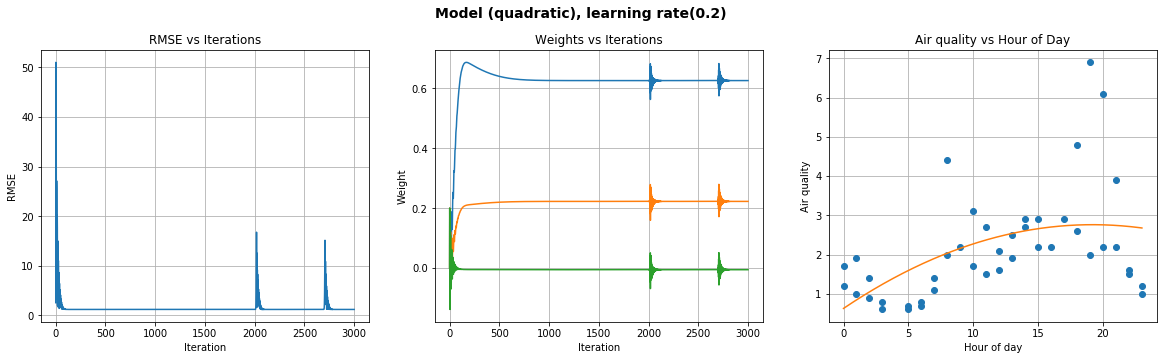

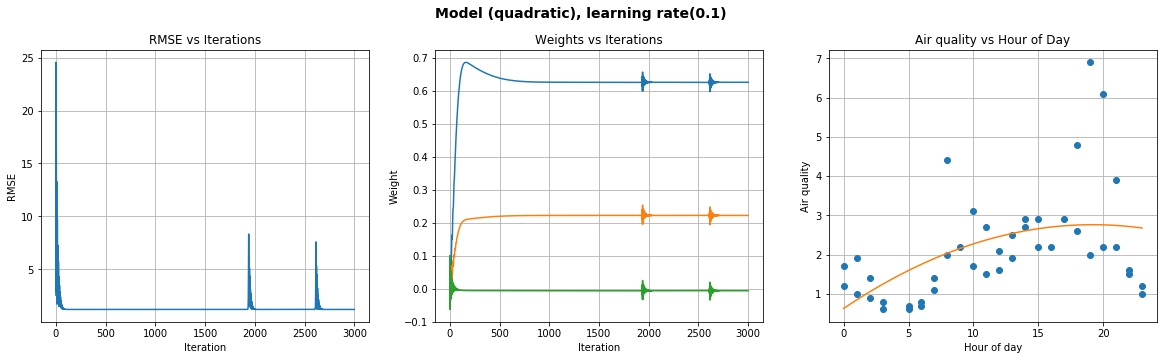

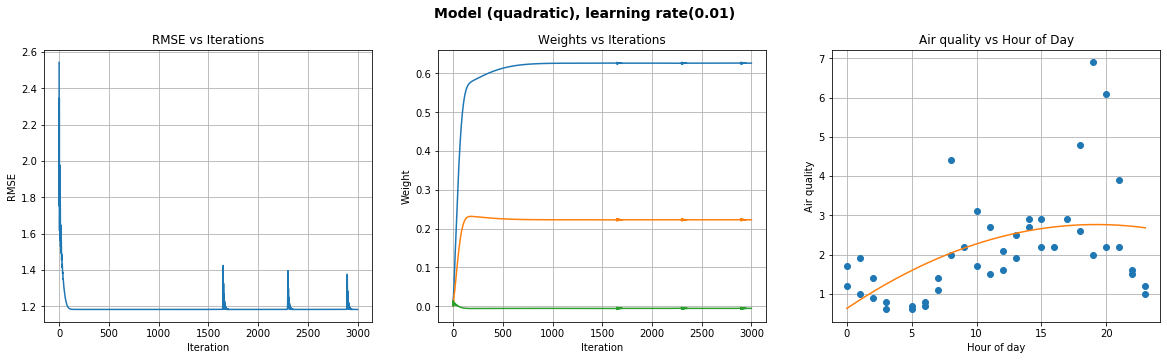

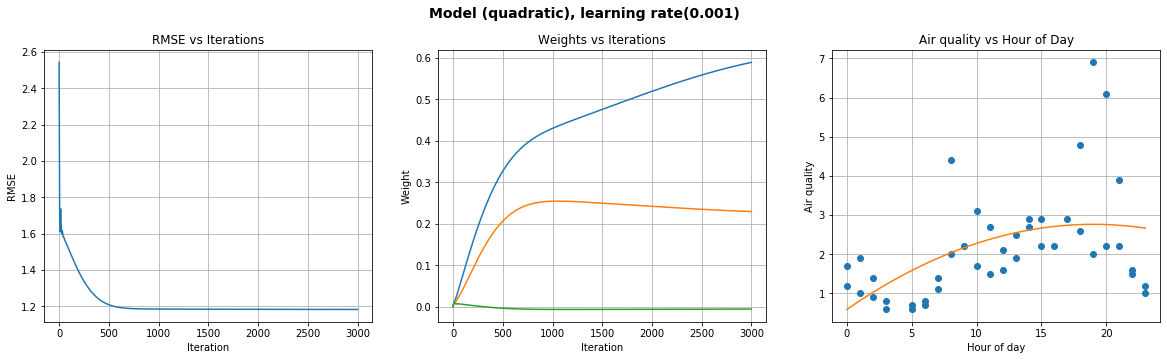

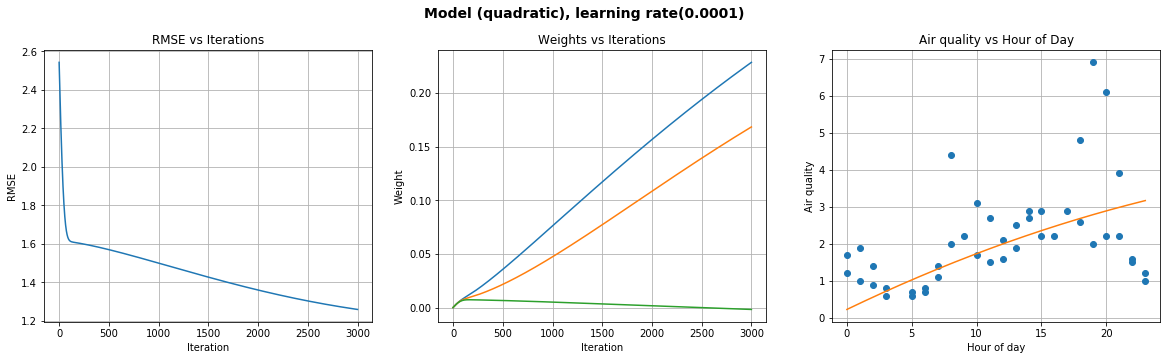

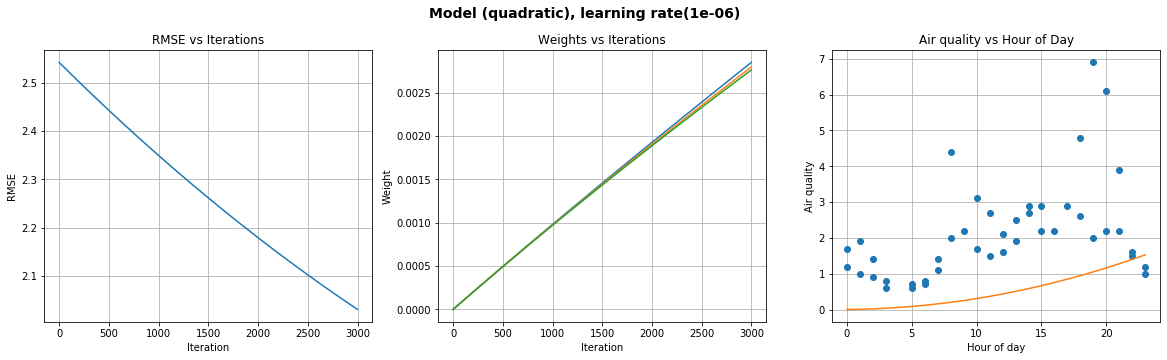

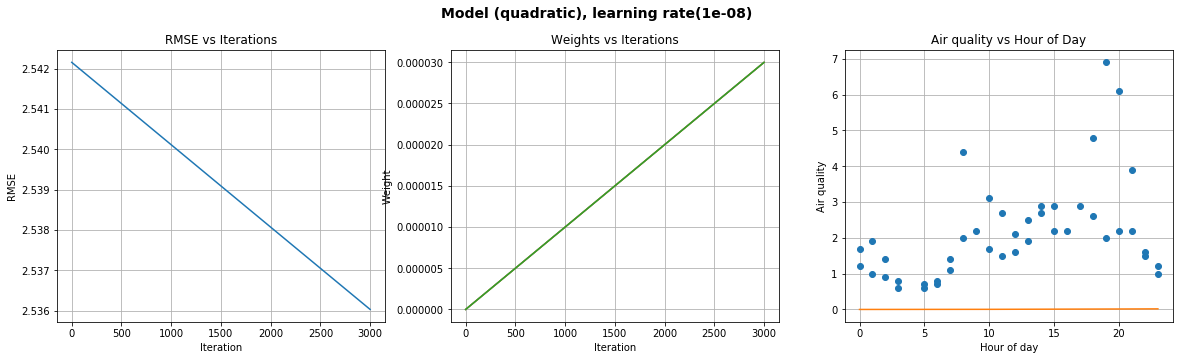

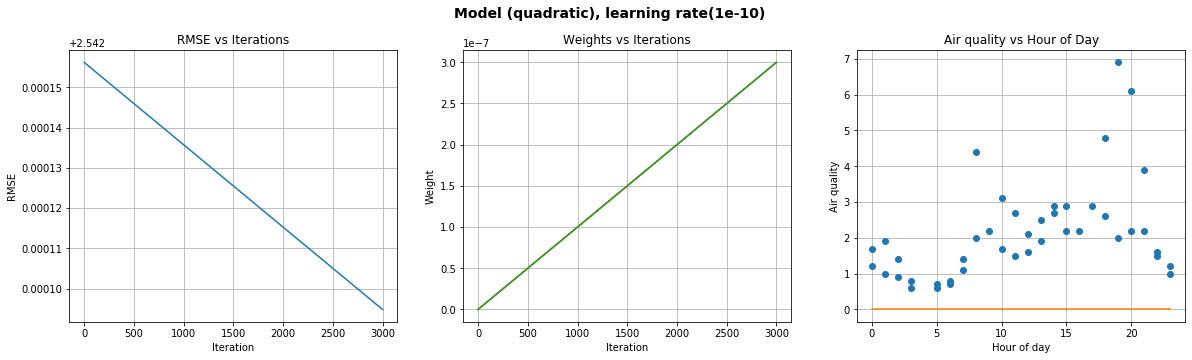

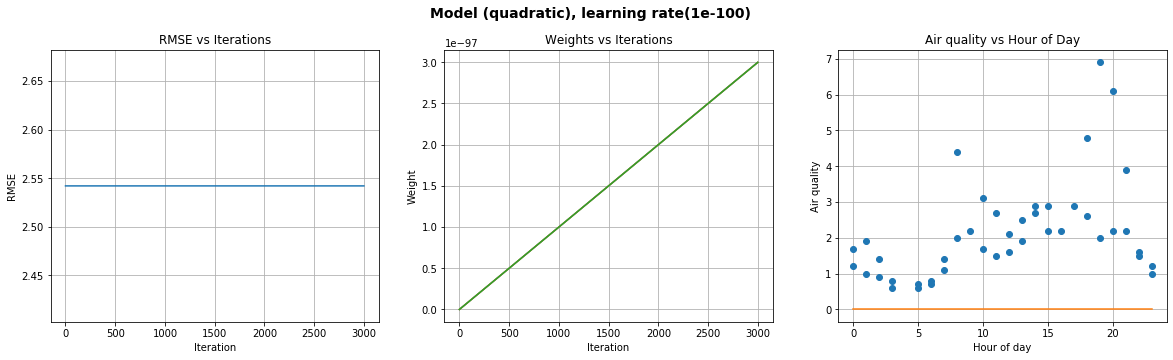

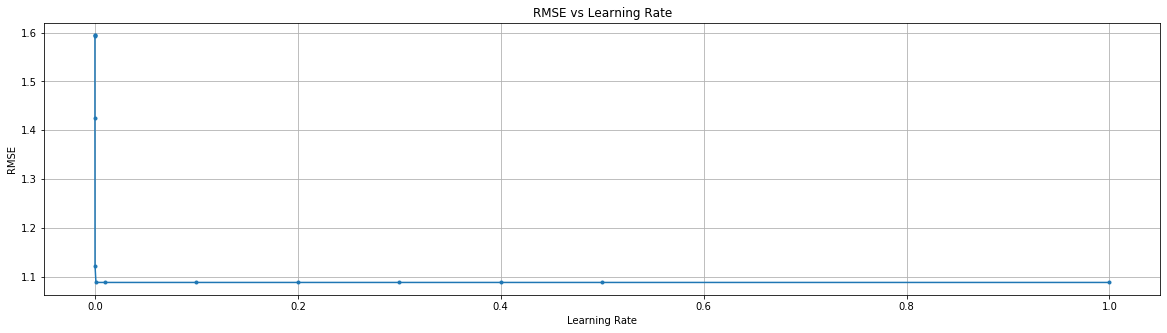

In [29]:
train_models_and_print("quadratic", quadratic_model, quadratic_model_gradient, 3)

Overall, a larger learning rater results in a better estimation (lower RMSE) and lower learning rates result in a worse estimateion (higher RMSE).  In both cases, the behavior does not continue without bound.  Specifically, the best RMSE (1.087891) is observed with a learning rate of 0.01.  Values above this do not yield any improvement.  The worst RMSE (1.594414) is observed with the lowest learning rate (1e-10), but the difference in RMSE between 1e-6 and 1e-10 is only 0.000019 or less than 1%.  From the charts, you can see that the lower learning rates result in a flatter line while the larger learning rates result in a 'curve' that better fits the target data. 

Final RMSE for rho 1.0 at step 3000 is 1.041910
Final RMSE for rho 0.5 at step 3000 is 1.048523
Final RMSE for rho 0.4 at step 3000 is 1.042986
Final RMSE for rho 0.3 at step 3000 is 1.041680
Final RMSE for rho 0.2 at step 3000 is 1.041841
Final RMSE for rho 0.1 at step 3000 is 1.041575
Final RMSE for rho 0.01 at step 3000 is 1.041416
Final RMSE for rho 0.001 at step 3000 is 1.043467
Final RMSE for rho 0.0001 at step 3000 is 1.070287
Final RMSE for rho 1e-06 at step 3000 is 1.339684
Final RMSE for rho 1e-08 at step 3000 is 1.561209
Final RMSE for rho 1e-10 at step 3000 is 1.594072
Final RMSE for rho 1e-100 at step 3000 is 1.594414


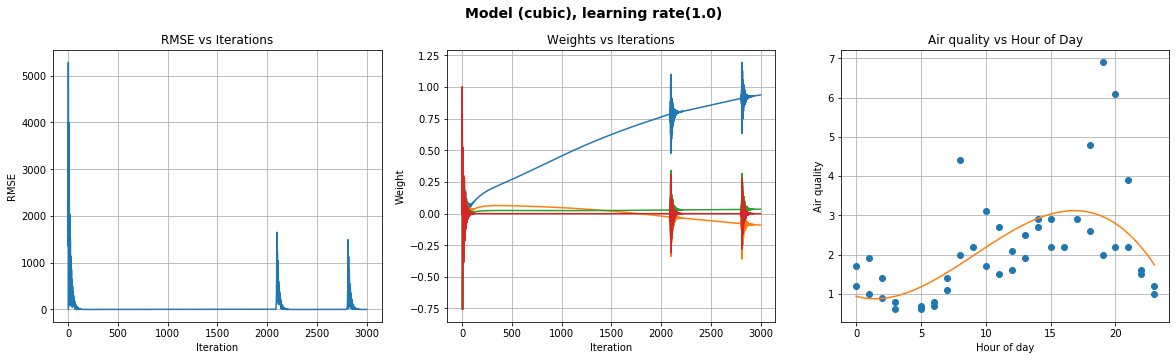

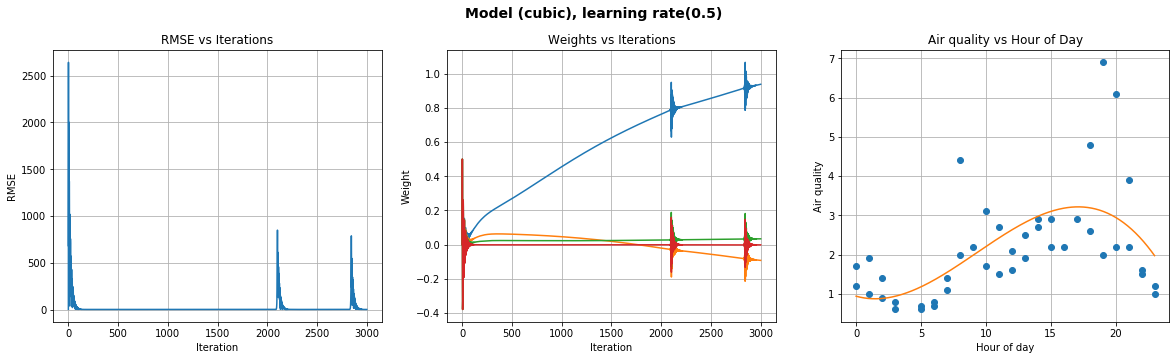

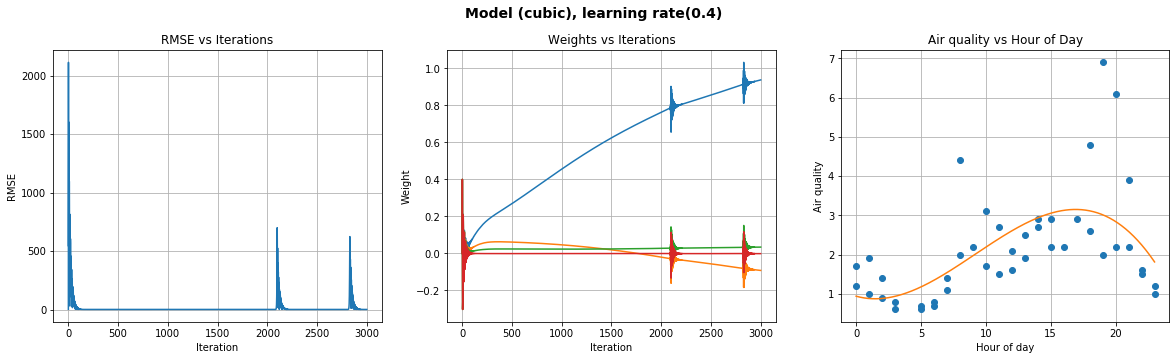

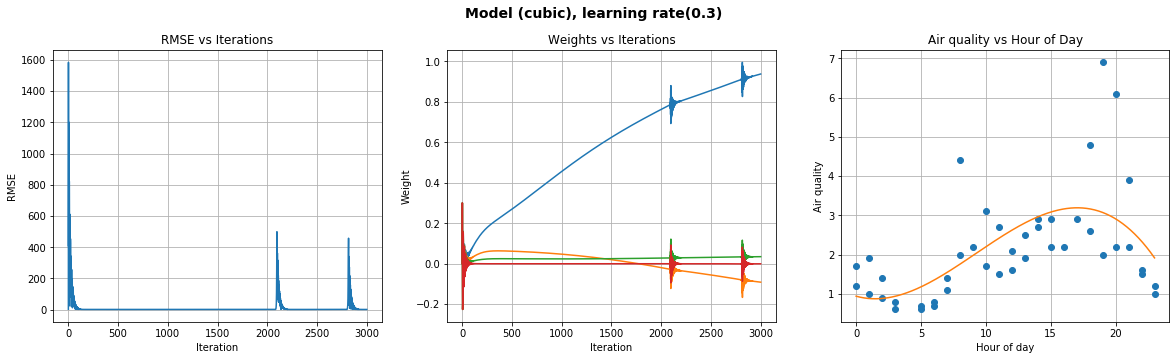

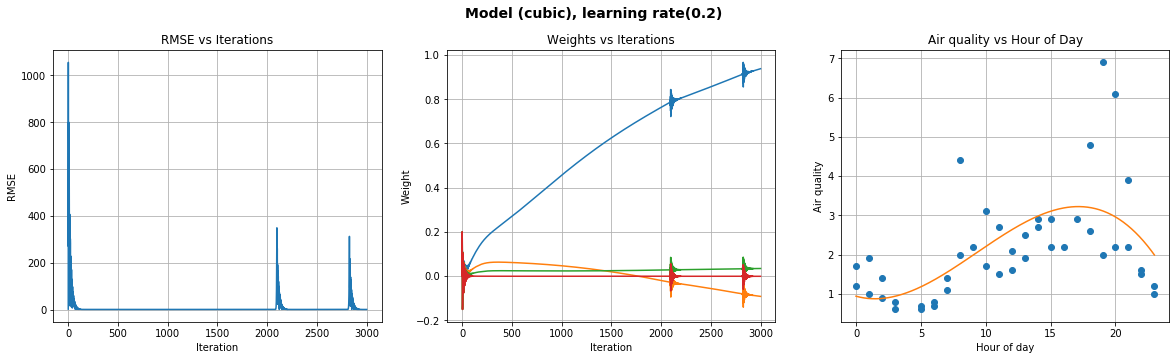

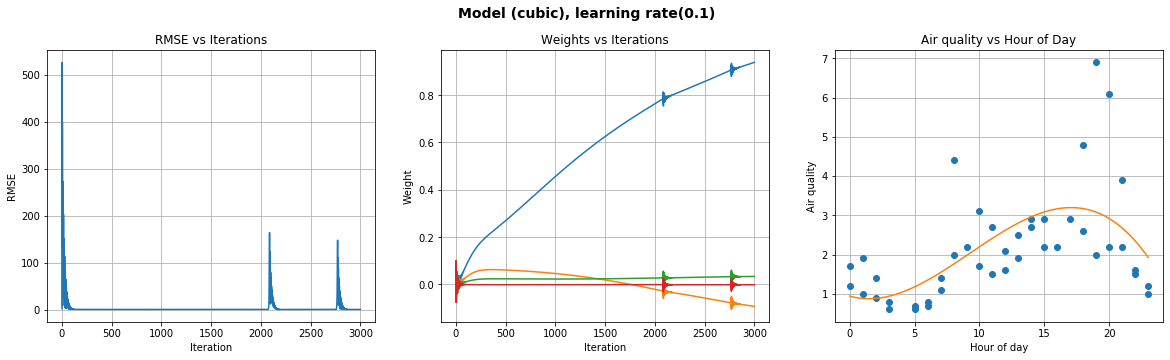

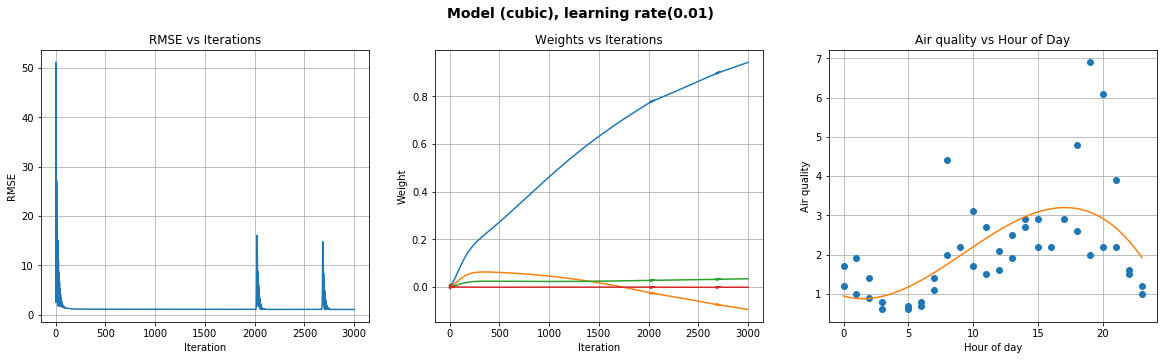

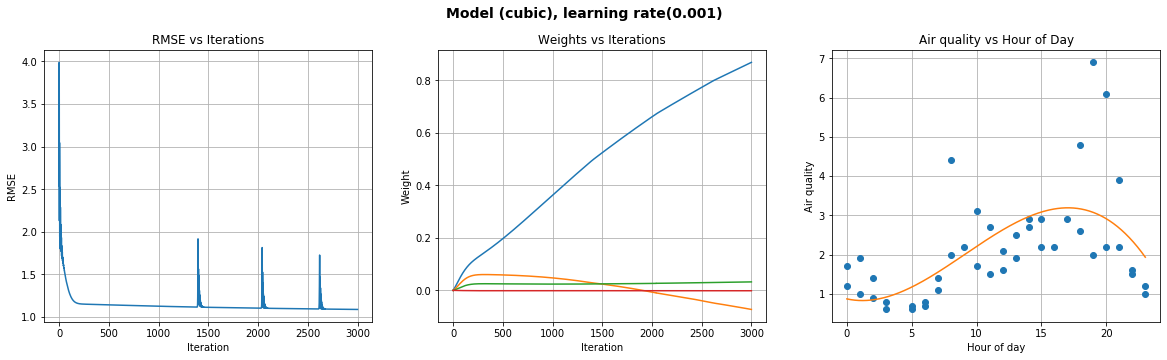

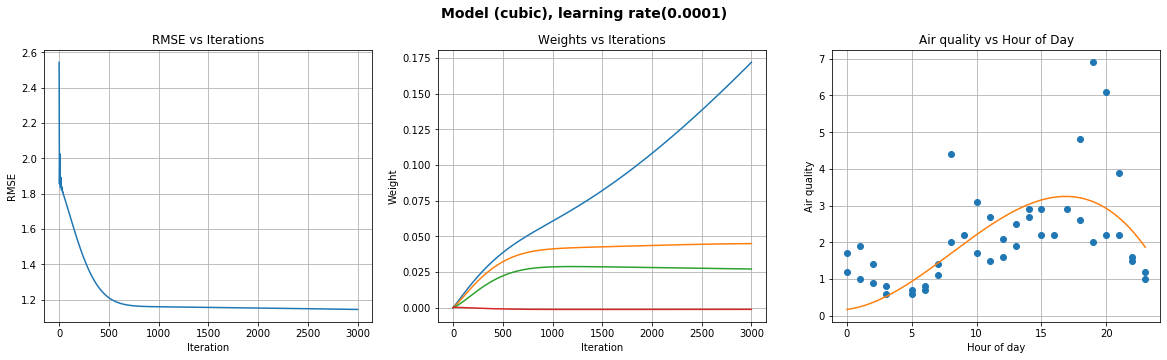

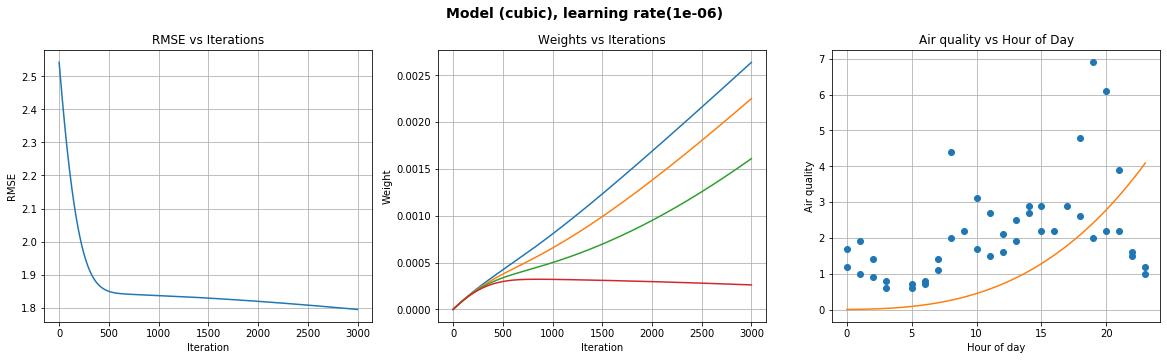

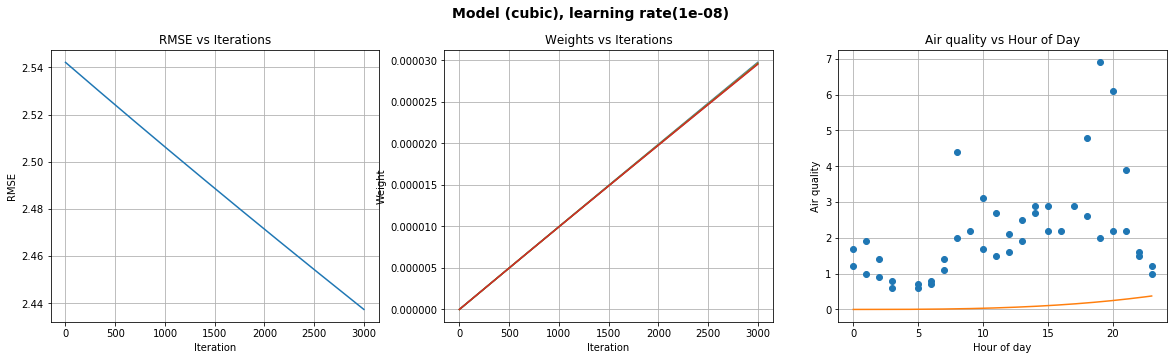

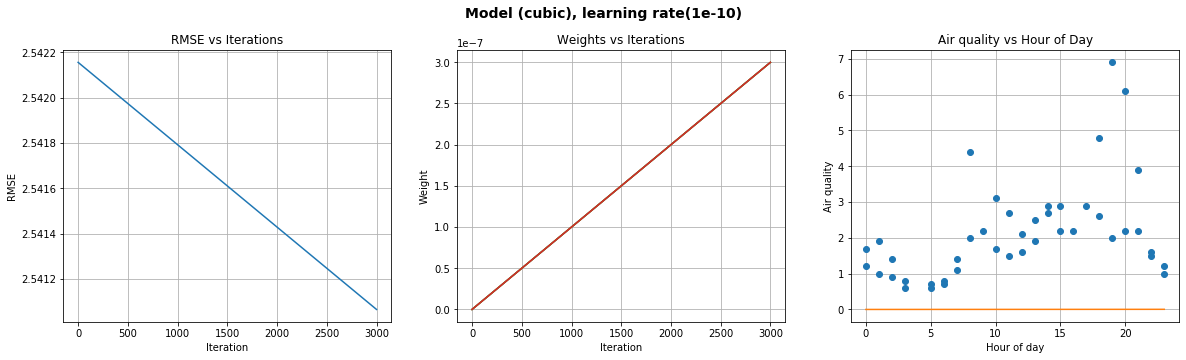

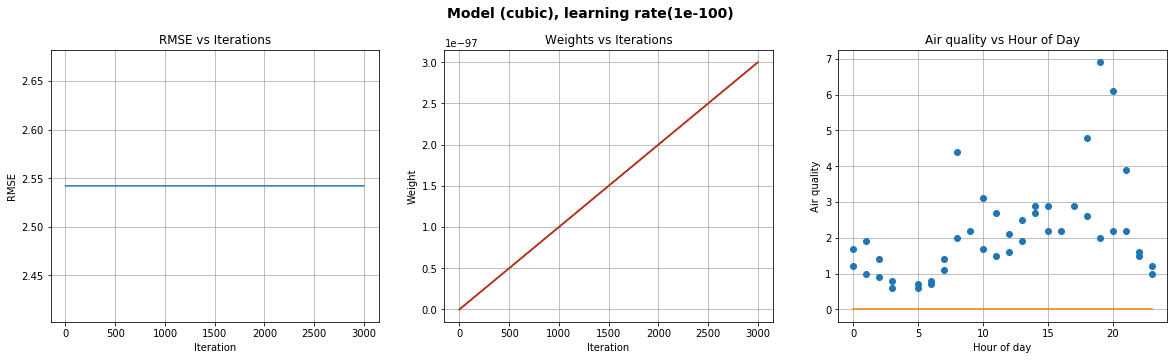

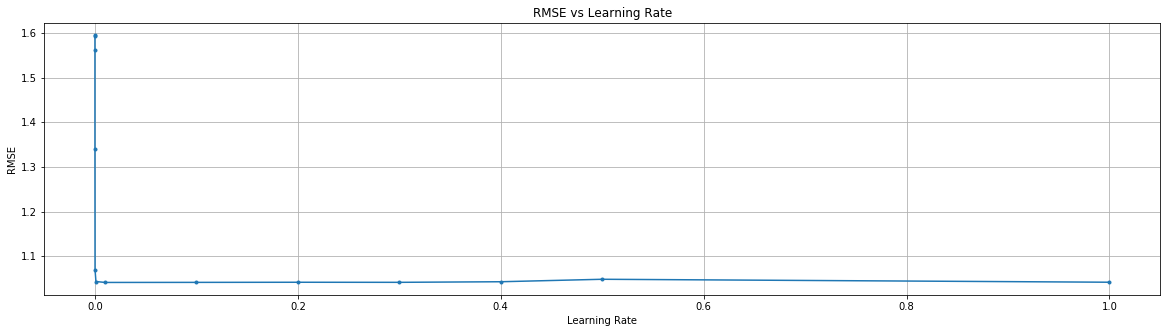

In [30]:
train_models_and_print("cubic", cubic_model, cubic_model_gradient, 4)

Overall, a larger learning rater results in a better estimation (lower RMSE) and lower learning rates result in a worse estimateion (higher RMSE). In both cases, the behavior does not continue without bound and is not strictly monotionic. Specifically, the best RMSE (1.041416) is observed with a learning rate of 0.01. Values above this do not yield any improvement and are generally slightly worse (~ 0.007). The worst RMSE (1.594414) is observed with the lowest learning rate (1e-10), but the difference in RMSE between 1e-8 and 1e-10 is only 0.033205 or less than 3%. From the charts, you can see that the lower learning rates result in a flatter line while the larger learning rates result in a more siusoidadl shape which better matches the shape of the target data points.

Final RMSE for rho 1.0 at step 3000 is 5.805389
Final RMSE for rho 0.5 at step 3000 is 2.618528
Final RMSE for rho 0.4 at step 3000 is 2.304337
Final RMSE for rho 0.3 at step 3000 is 1.573503
Final RMSE for rho 0.2 at step 3000 is 1.410050
Final RMSE for rho 0.1 at step 3000 is 1.255943
Final RMSE for rho 0.01 at step 3000 is 1.054502
Final RMSE for rho 0.001 at step 3000 is 1.054567
Final RMSE for rho 0.0001 at step 3000 is 1.432068
Final RMSE for rho 1e-06 at step 3000 is 1.116928
Final RMSE for rho 1e-08 at step 3000 is 1.413977
Final RMSE for rho 1e-10 at step 3000 is 1.588089
Final RMSE for rho 1e-100 at step 3000 is 1.594414


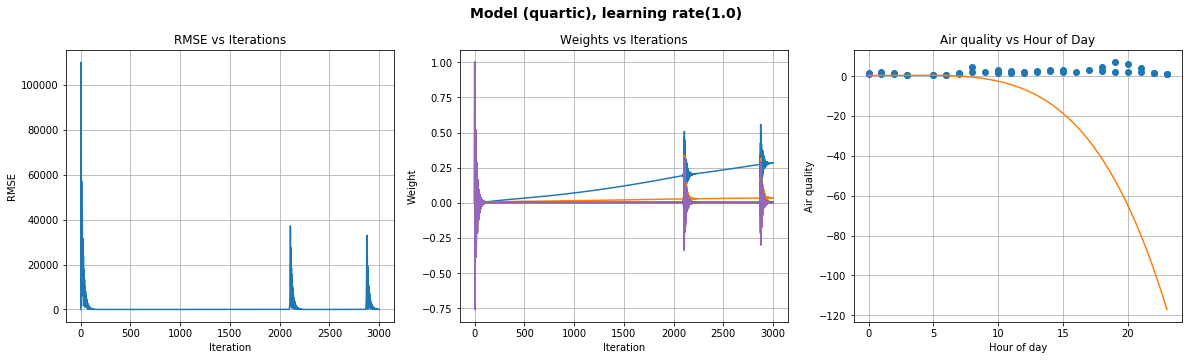

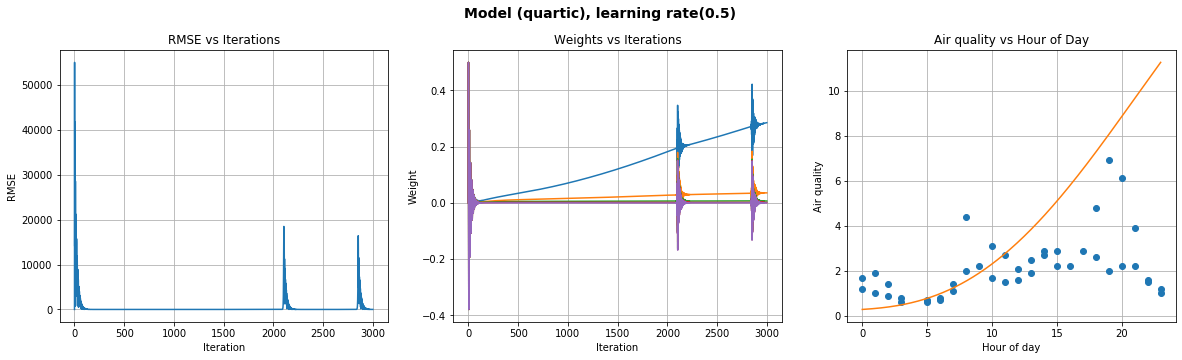

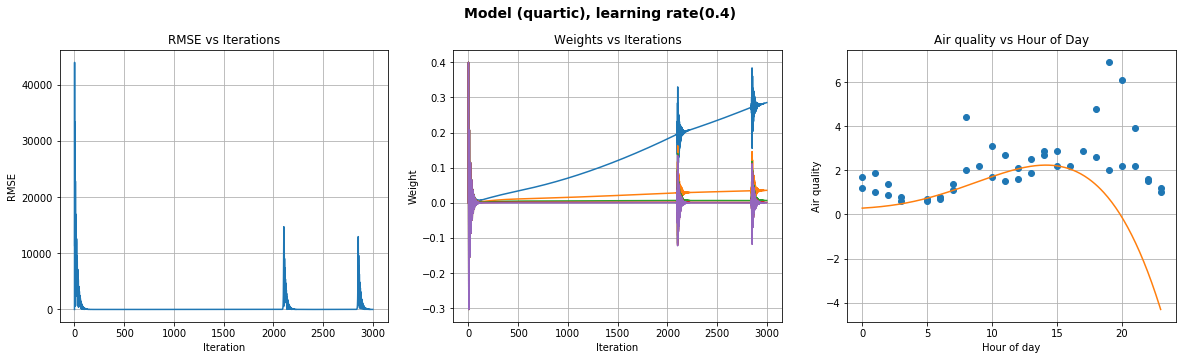

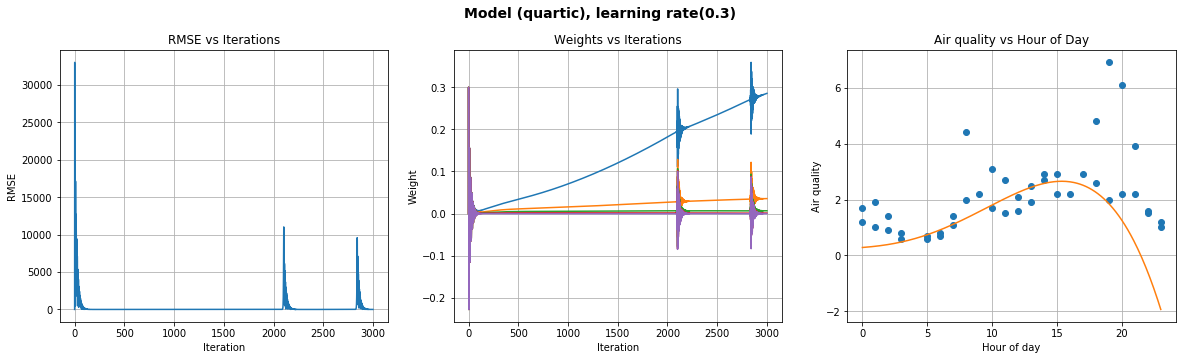

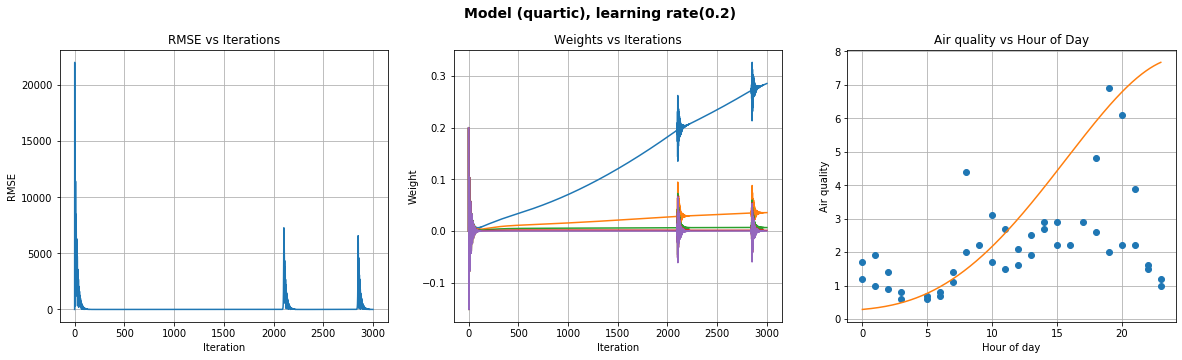

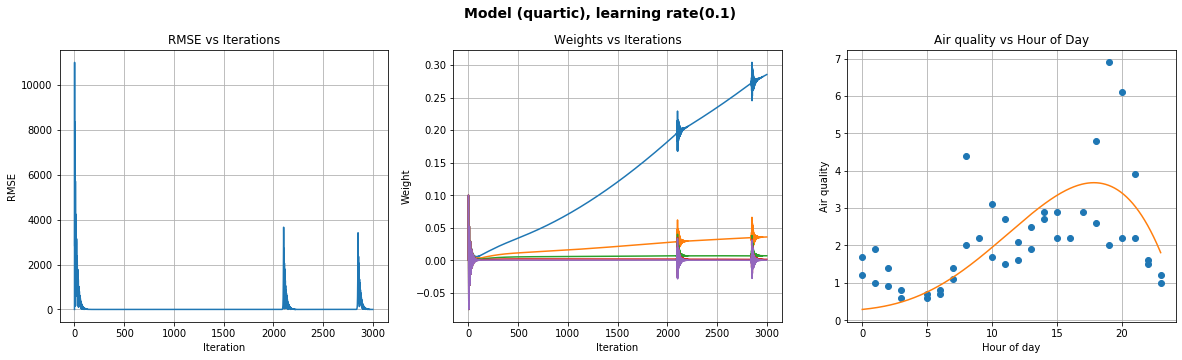

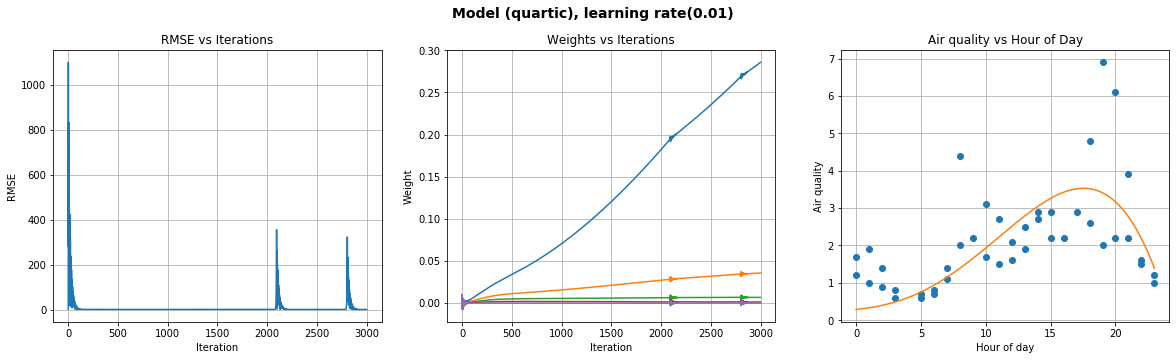

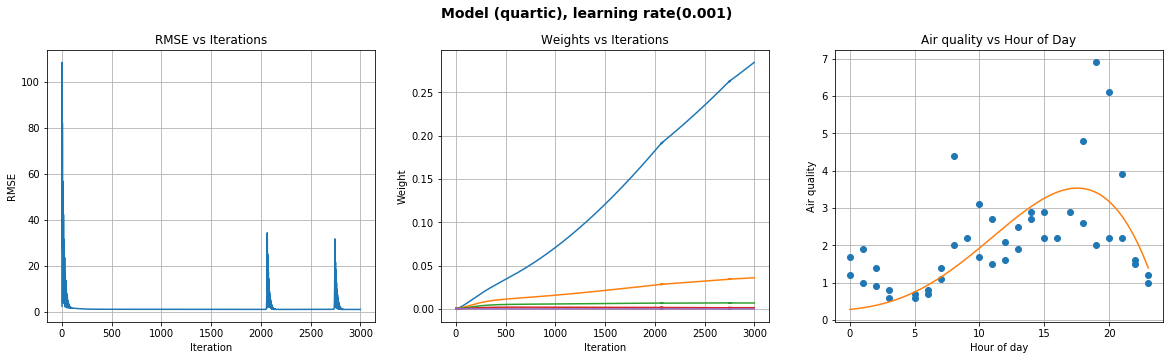

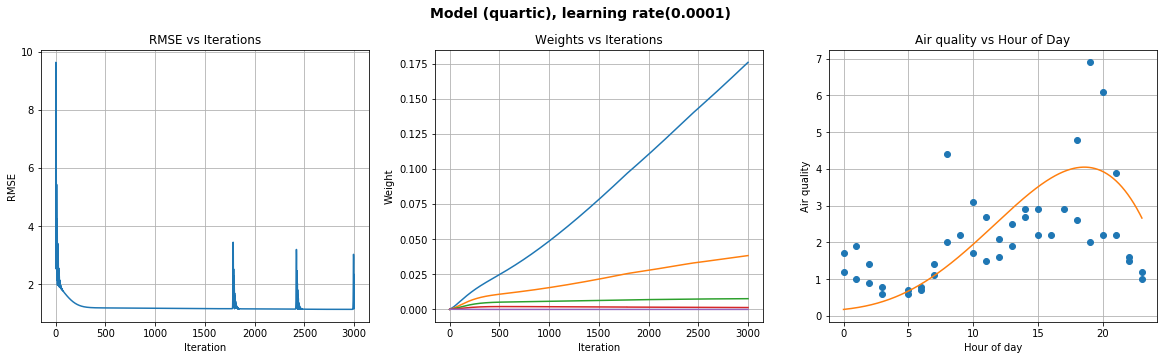

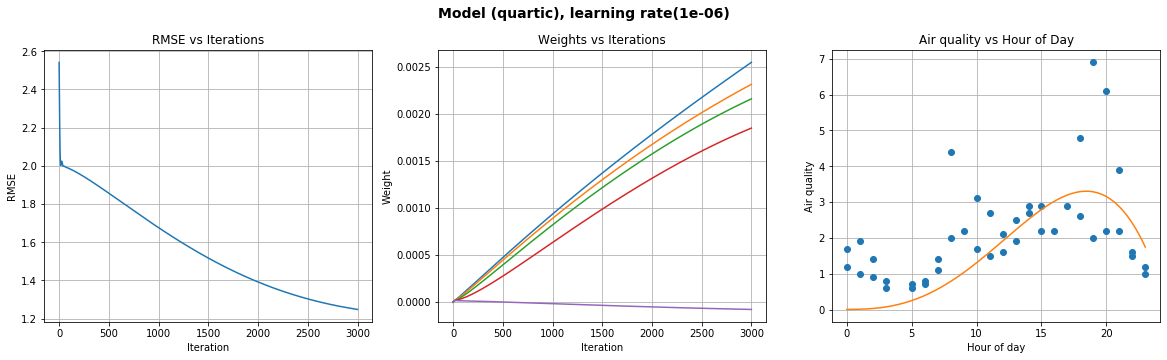

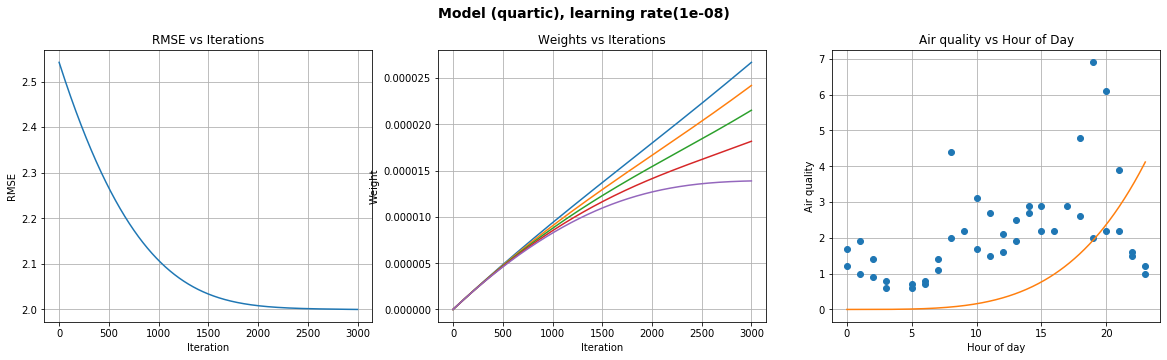

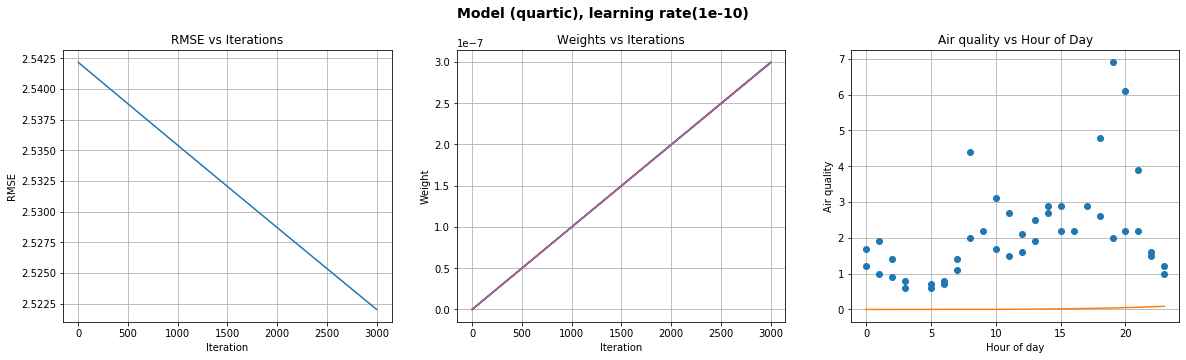

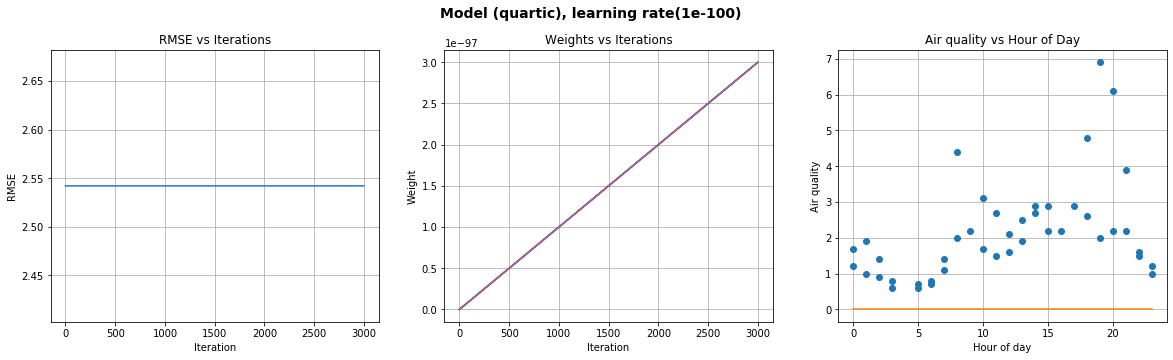

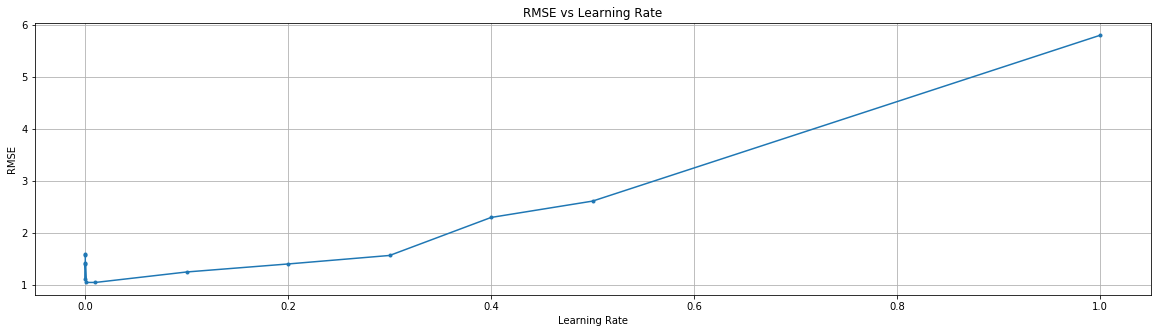

In [31]:
train_models_and_print("quartic", quartic_model, quartic_model_gradient, 5)

Overall, the range of values that yields the best result (lower RMSE) is narrow and near 1.e-1.  Larger values casue the RMSE to increase much quicker than small values, but both ranges result in worst performance (higher RMSE).  From the charts above, you can see that larger learning rates result in large variations later in the day, while lower lerning rates result in much flatter (linear) approximations.

### Overall observation

The learning rate that yields the best (lowest) RMSE for each model is 
* Linear    - Final RMSE for rho 0.001 at step 3000 is 1.101005
* Quadratic - Final RMSE for rho 0.01 at step 3000 is 1.087891
* Cubic     - Final RMSE for rho 0.01 at step 3000 is 1.041416
* Quartic   - Final RMSE for rho 0.01 at step 3000 is 1.054502  

The best overall model is the **cubi model** which has a RMSE of 1.041416.  The difference between the best model and the worst is only 0.059589 or ~5% and all models had the best performance at, or near, a learning rate of 1.e-2.  

Each model shows multiple 'spikes' in the 'RMSE vs Iteration' and 'Weights vs Iterations' charts that I have not been able to understand.

## Extra Credit (1 point)

Write functions for a model and its gradient that is a linear (affine) function plus a sine function.  Repeat the above experiments with the air quality data using your new model. Include plots and explanations.  
  
**NOTE:** This needs to be placed before the call to the grading script else you will get errors for undefined variables.  This is mosst likely caused by the following code in the A1grader.py script
  
*tree.body.remove(node)*  
  
Which removes everything that is not a function definition or import statement

### Linear SINE Functions

In [32]:
# y = W2*sine(X) + W1*X + W0
def linear_sine_model(X, W):
    n_columns = X.shape[1]
    linear_part = X @ W[1:n_columns + 1, :] + W[0,:]
    nonlinear_part = np.sin(X) @ W[n_columns + 1:n_columns + 2, :]
    return nonlinear_part + linear_part

In [33]:
def linear_sine_model_gradient(X, T, W):
    dEdY = -2 * (T - linear_sine_model(X, W))
    linear_part = np.insert(X, 0, 1, axis=1)
    nonlinear_part = np.cos(X)
    dYdW = np.hstack((linear_part, nonlinear_part))
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

##### Linear SINE Function Verification

Linear SINE Model Gradient - Expeiment 1 ([[ -2.92509772 -39.1709491   -0.49147948]])
Linear SINE Model Gradient - Expeiment 2 ([[ -5.02533956 -63.08780013  -0.5960235 ]])


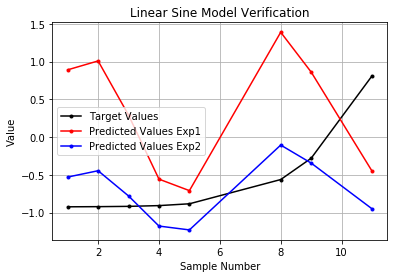

In [34]:
# Linear Sine model data
X1 = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))  # Input data
T1 = (((X1 - 5) * 0.05 +  (X1 * 0.2) **5) / 5.0 - 5.5) / 6 # Target values
W1 = np.array([0.0, 0.05, 1.]).reshape(-1, 1)              # Experiment 1 - Weights
Y1 = linear_sine_model(X1, W1)                             # Experiment 1 - Model output
E1 = linear_sine_model_gradient(X, T, W1)                  # Experiment 1 - Gradients
W2 = np.array([-1.0, 0.05, 0.5]).reshape(-1, 1)            # Experiment 2 - Weights
Y2 = linear_sine_model(X1, W2)                             # Experiment 2 - Model output
E2 = linear_sine_model_gradient(X, T, W2)                  # Experiment 2 - Gradients

# Plot the results
plt.title('Linear Sine Model Verification')                # Add plot title
plt.plot(X1, T1, 'k.-', label='Target Values')             # Plot target values
plt.plot(X1, Y1,'r.-', label='Predicted Values Exp1')      # Plot values from model - Experiment 1
plt.plot(X1, Y2,'b.-', label='Predicted Values Exp2')      # Plot values from model - Experiment 2
plt.grid(True)                                             # Display a grid on plot
plt.xlabel('Sample Number')                                # Add X-Axis label
plt.ylabel('Value')                                        # Add Y-Axis label
plt.legend();                                              # Add Legend

# Print the Linear SINE Model gradient outputs
print("Linear SINE Model Gradient - Expeiment 1 ({})".format(E1.T))
print("Linear SINE Model Gradient - Expeiment 2 ({})".format(E2.T))

The graph above shows two estimations of test data using a **linear sine** mode with different weights and the output of the corresponding gradient function.  It can be seen that the second prediction (blue line) is much closer to the test data than the first.  It will be shown next that the weights can be adjusted to find an optimal estimation that minimizes the error.

##### Train Extra Credit Model

Final RMSE for rho 1.0 at step 3000 is 54.839000
Final RMSE for rho 0.5 at step 3000 is 38.725227
Final RMSE for rho 0.4 at step 3000 is 34.615276
Final RMSE for rho 0.3 at step 3000 is 29.949393
Final RMSE for rho 0.2 at step 3000 is 24.413318
Final RMSE for rho 0.1 at step 3000 is 17.176734
Final RMSE for rho 0.01 at step 3000 is 5.056258
Final RMSE for rho 0.001 at step 3000 is 1.440351
Final RMSE for rho 0.0001 at step 3000 is 1.117797
Final RMSE for rho 1e-06 at step 3000 is 1.582607
Final RMSE for rho 1e-08 at step 3000 is 1.594296
Final RMSE for rho 1e-10 at step 3000 is 1.594413
Final RMSE for rho 1e-100 at step 3000 is 1.594414


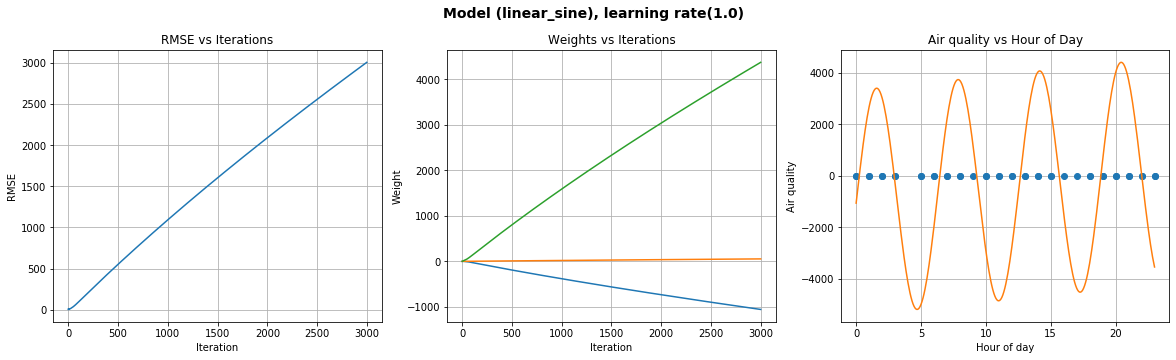

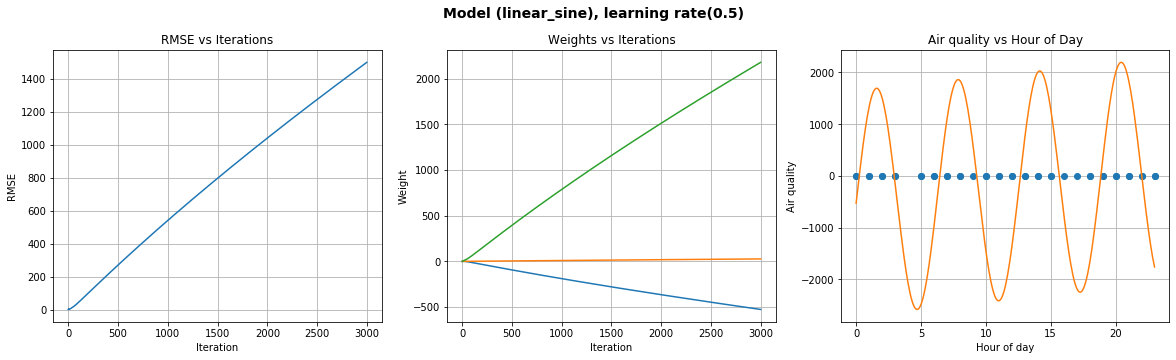

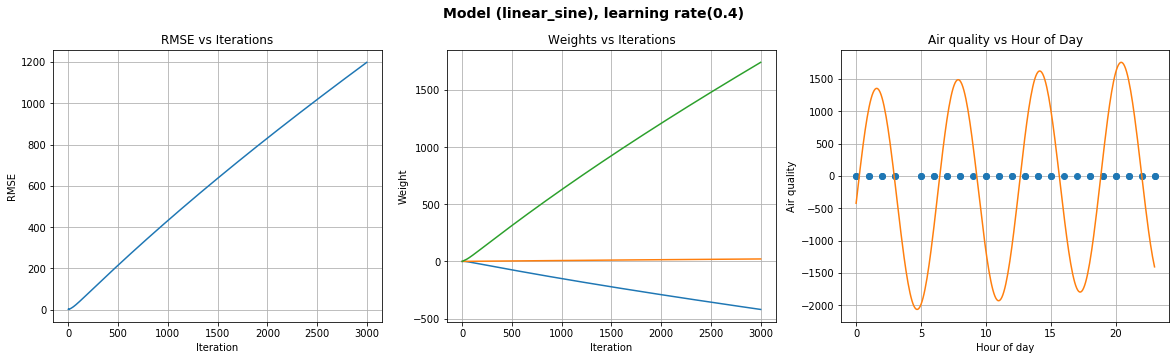

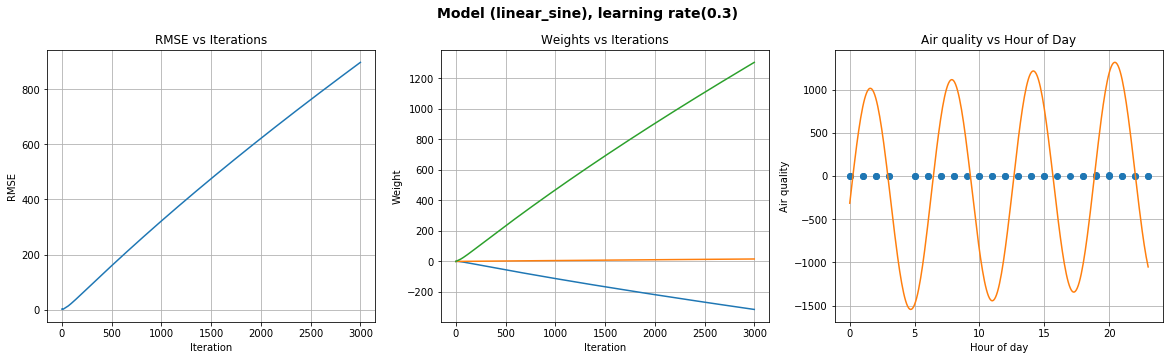

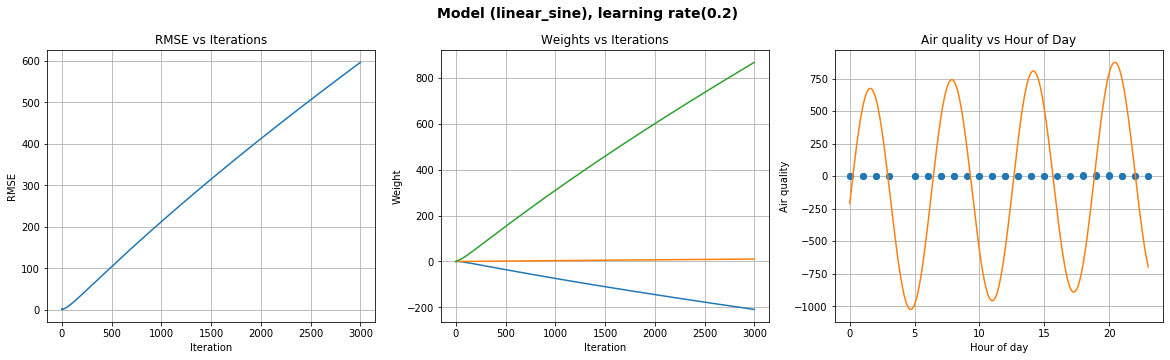

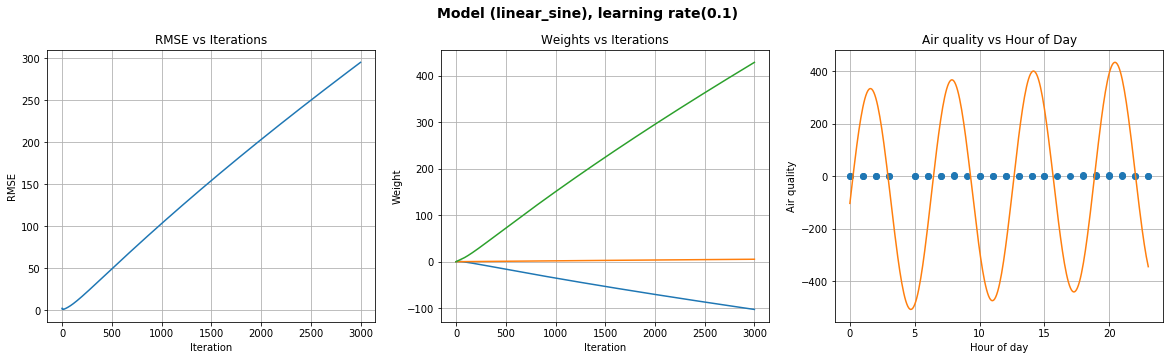

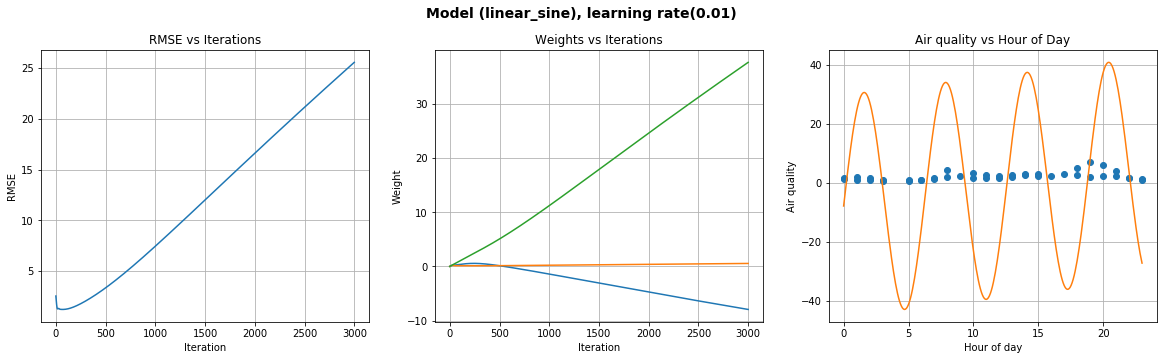

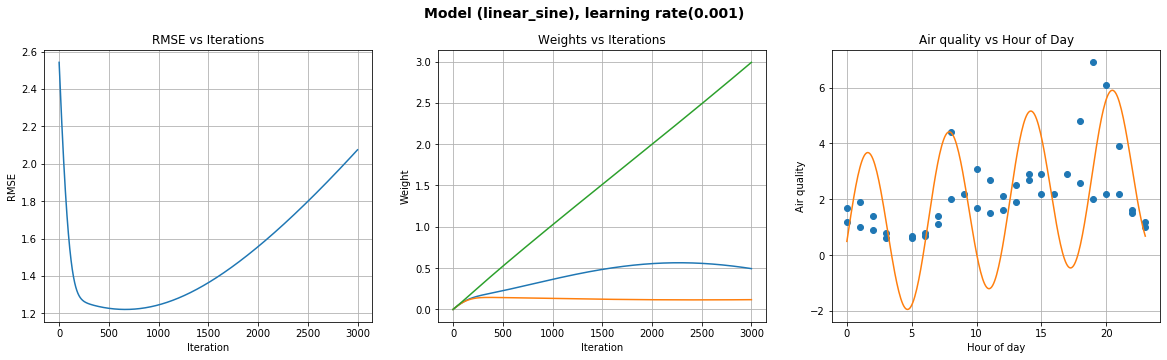

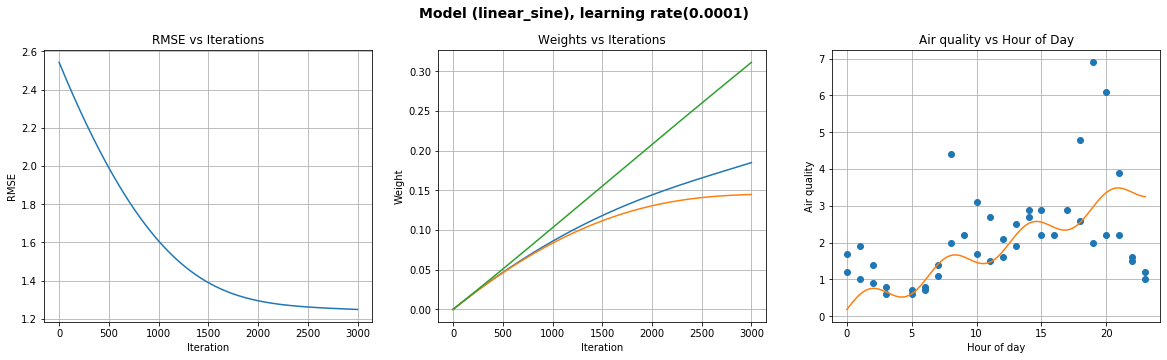

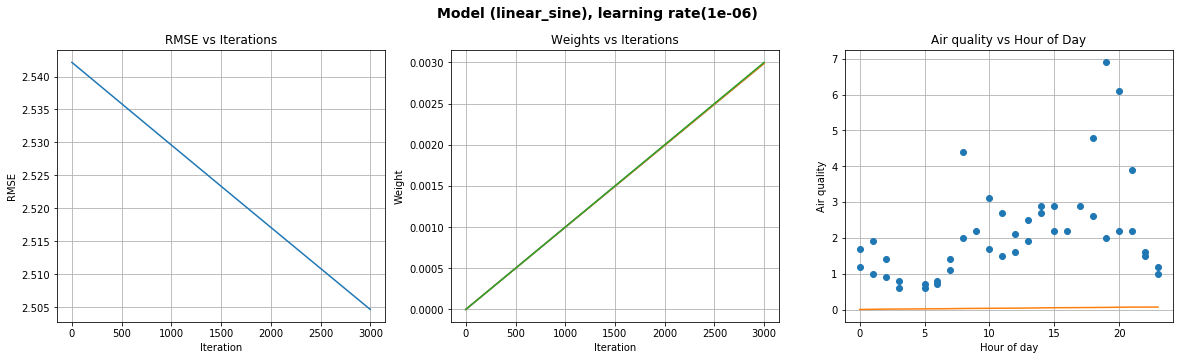

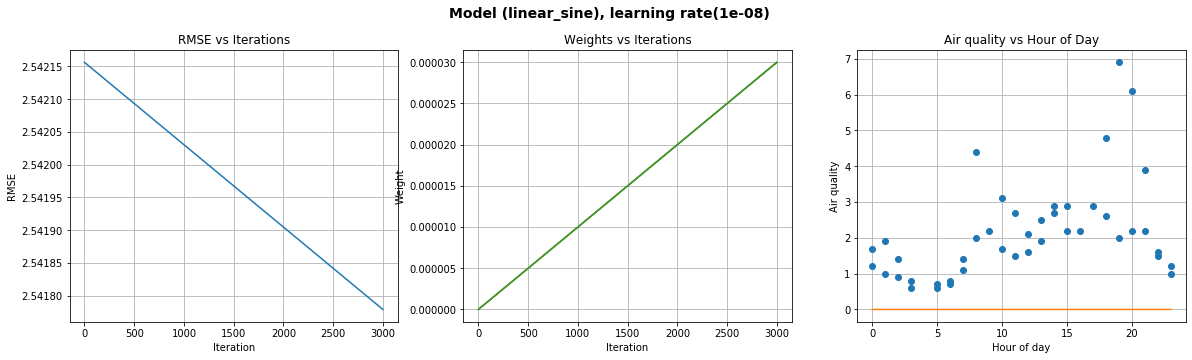

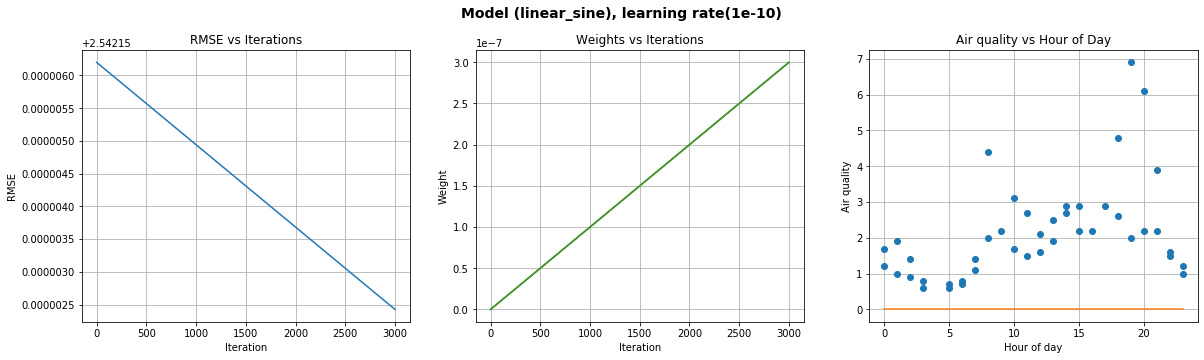

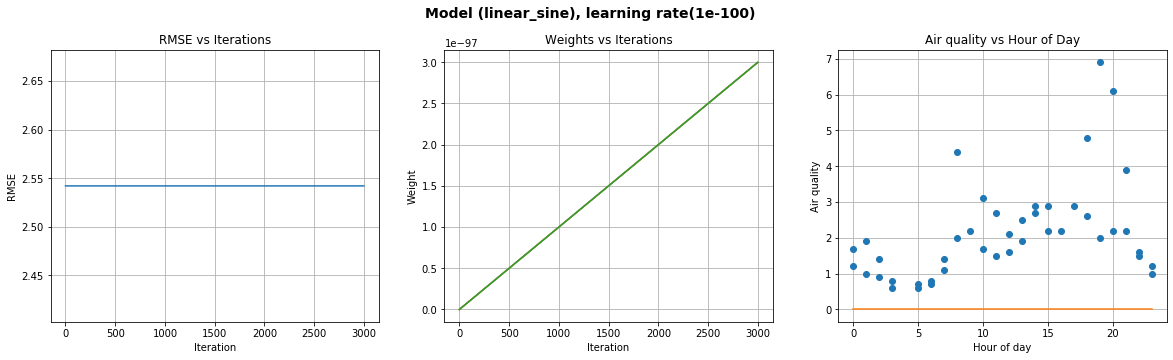

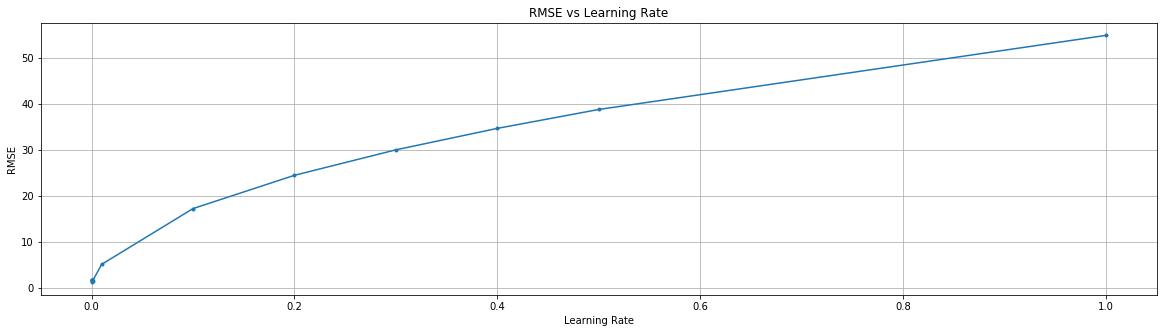

In [35]:
train_models_and_print("linear_sine", linear_sine_model, linear_sine_model_gradient, 3)

Overall, a larger learning rater results in a worse estimation (higher RMSE) and lower learning rates result in a better estimateion (lower RMSE).  From the charts above, it can be seen that the high RMSE was caused by a sinusoidal output with a large magnitude.  As the learning rate decreased, the output flattened and eventually becomes a straight line. The best behaviour was found with a learning rate of 0.0001 where the RMSE is 1.117797

## Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.zip](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.zip) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 80/80 if your functions are defined correctly. The remaining 20 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [36]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Staab-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2]).reshape(-1, 1)
  Y = linear_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3]).reshape(-1, 1)
  Y = quadratic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5).reshape(-1, 1)
  Y = cubic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5, 0.3]).reshape(-1, 1)
  Y = quartic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3,

<Figure size 432x288 with 0 Axes>

## Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/86986).

Grading will be based on 

  * correct behavior of the required functions listed above,
  * easy to understand plots in your notebook,
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook.